In [ ]:
# install.packages('astsa')
install.packages('TSA')
install.packages('forecast')
install.packages("rugarch")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘xts’, ‘TTR’, ‘quadprog’, ‘zoo’, ‘quantmod’, ‘leaps’, ‘locfit’, ‘tseries’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘fracdiff’, ‘lmtest’, ‘Rcpp’, ‘timeDate’, ‘urca’, ‘RcppArmadillo’




In [ ]:
# library('astsa')
library('TSA')
library('forecast')
require(rugarch)


Attaching package: ‘TSA’


The following objects are masked from ‘package:stats’:

    acf, arima


The following object is masked from ‘package:utils’:

    tar


Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 

Registered S3 methods overwritten by 'forecast':
  method       from
  fitted.Arima TSA 
  plot.Arima   TSA 



In [ ]:
library(tseries)

**TITLE:**


*Time Series Analysis of seasonal dataset and non-seasonal dataset with the help of ARIMA models and forecasting.*

**ABSTRACT:**

*The basic objective usually is to determine a model that describes the pattern of the time series to describe the important features of the time series pattern and also to explain how the past affects the future.To forecast future values of the series.In this particular project we analyze two different datasets,* 
1. Seasonal 
2. Non-Seasonal

**Keywords:**: *Seasonal,Non-Seasonal, Forecast, Time series*

**INTRODUCTION:**

*Time series is a sequence of data points in chronological sequence, most often gathered in regular intervals. Time series analysis can be applied to any variable that changes over time and generally speaking, usually data points that are closer together are more similar than those further apart.Time series analysis accounts for the fact that data points taken over time may have an internal structure (such as autocorrelation, trend or seasonal variation) that should be accounted for.*

**METHODOLOGY:**

*We generally follow a Box-Jenkins method for any Time series Analysis.There are six major steps in it.*

*They are:*



1.   Checking Stationarity
2.   Finding Models
3.   Parameter Redundancy
4.   Parameter Estimation
5.   Residual Analysis
6.   Prediction (Forecasting)





*1. Checking Stationarity: A Time series should be stationary before fitting a model.Dickey - Fuller Test is used to find whether the Time series is Stationary or not. If it isn't the time series should be made stationary by different methods like Differencing , Detrending , Tranformation.*

*2. Finding Models: Deciding the models which might be appropriate to the given time series is done by checking the Auto correlation and Partial auto correlation plots.The orders p,q is found by checking the ACF and PACF plots.Number of lags that rise significantly above the confidence interval decide the number of parameters.EACF can also be used to decide on models.*

*3. Parameter Redundancy & 4. Parameter Estimation: After finding models the best model should be chosen to fit to the time series.This can be done by comapring the models using AIC, BIC, log-likelihood criteria. Best model is to be chosen which has lesser number of parameters and a good performance.*

*5. Residual Analysis: Residuals play a important role in deciding whether the model chosen is best suited or not. There are different ways to check it.ACF plot gives us the dependency of residuals.We aim that residuals are uncorrelated from the ACF plot. Normality of the residuals should be tested using various plots(QQ plot, Histogram and Shapiro-Wilk Test). Ljung - Box test tells whether the residuals are a form of white noise or not.*

*6. Forecasting: This is the last and final step of any Time series Analysis. Chossing the best model from the above steps, forecasting should be done on the original time series to see how the variable changes over time or in the future.*

**MODELS:**

*We generally use ARIMA models for Time series Modelling.*

*ARIMA - Auto Regressive Integrated Moving Average*

*ARIMA(p,d,q)*

1.   p - Auto Regressive order
2.   q - Moving Average order
3.   d - Differencing factor

*If d=0, then we reduce it to ARMA(p,q)*

*Seasonal Data: In a seasonal time series Seasonal Auto regressive Integrated Moving Average approach (SARIMA / SARMA) is followed.*

*Non-Seasonal Data: ARIMA / ARMA is used for a non-seasonal time series.*





**Seasonal Dataset:**



CO2 PPM - Trends in Atmospheric Carbon Dioxide. Data are sourced from the US Government’s Earth System Research Laboratory, Global Monitoring Division. The data contains the Carbon dioxide emissions on a monthly basis.The data starts from March 1958.The colu*mn interpolated gives the emission value of each month. This is a datahub.io certified dataset. The data follows seasonality and we describe it's component in the further sections.*

*Data Scource - https://datahub.io/core/co2-ppm#readme*

In [ ]:
d<-read.csv('/content/co2-mm-mlo_csv.csv')

In [ ]:
summary(d)

     Date            Decimal.Date     Average        Interpolated  
 Length:727         Min.   :1958   Min.   :-99.99   Min.   :312.7  
 Class :character   1st Qu.:1973   1st Qu.:328.43   1st Qu.:328.6  
 Mode  :character   Median :1988   Median :351.31   Median :351.3  
                    Mean   :1988   Mean   :349.56   Mean   :353.6  
                    3rd Qu.:2004   3rd Qu.:375.70   3rd Qu.:375.7  
                    Max.   :2019   Max.   :411.24   Max.   :411.2  
     Trend       Number.of.Days 
 Min.   :314.6   Min.   :-1.00  
 1st Qu.:329.3   1st Qu.:-1.00  
 Median :351.4   Median :24.00  
 Mean   :353.6   Mean   :18.34  
 3rd Qu.:376.1   3rd Qu.:28.00  
 Max.   :409.0   Max.   :31.00  

In [ ]:
head(d)

,Date,Decimal.Date,Average,Interpolated,Trend,Number.of.Days
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,1958-03-01,1958.208,315.71,315.71,314.62,-1
2,1958-04-01,1958.292,317.45,317.45,315.29,-1
3,1958-05-01,1958.375,317.50,317.50,314.71,-1
4,1958-06-01,1958.458,-99.99,317.10,314.85,-1
5,1958-07-01,1958.542,315.86,315.86,314.98,-1
6,1958-08-01,1958.625,314.93,314.93,315.94,-1


*As we need only the Interpolated column we either drop the other variables or just take the required column.*

In [ ]:
drop<-c('Trend','Decimal.Date','Average','Number.of.Days')

In [ ]:
dat<-d[,!(names(d) %in% drop)]

In [ ]:
head(dat)

,Date,Interpolated
,<chr>,<dbl>
1,1958-03-01,315.71
2,1958-04-01,317.45
3,1958-05-01,317.50
4,1958-06-01,317.10
5,1958-07-01,315.86
6,1958-08-01,314.93


In [ ]:
data1<-dat[2]
# data2<-dat[400:520,]

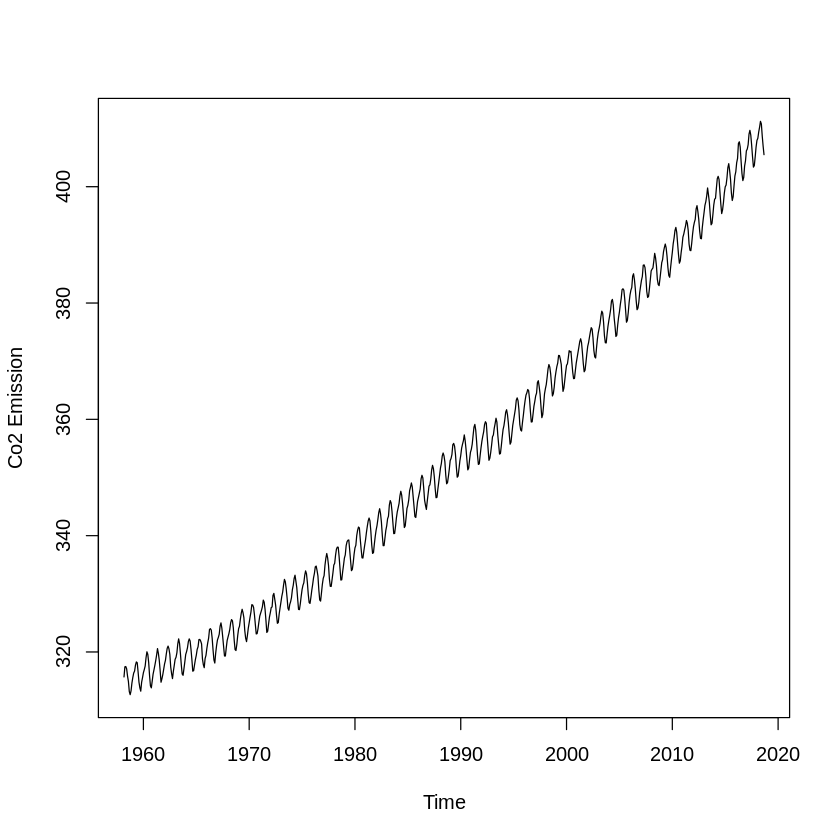

In [ ]:
data<-ts(data1,frequency=12,start=c(1958,3))
plot(window(data,start=c(1958,3)),ylab='Co2 Emission')

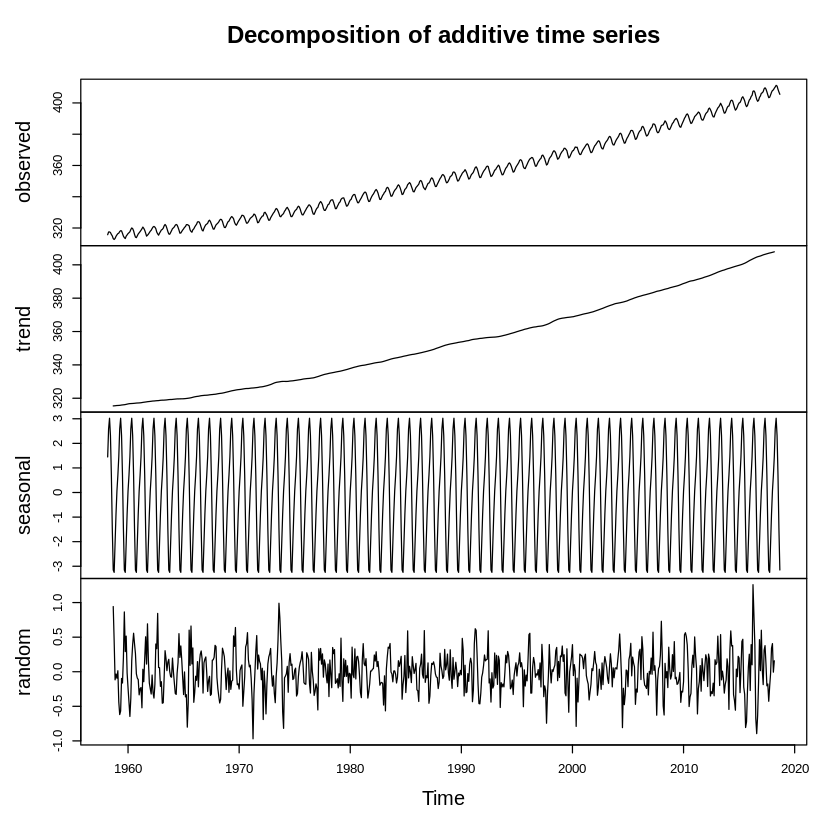

In [ ]:
plot(decompose(data))

*By observing the time series plot of the Interpolated variable we can definitely say that it follows seasonality and it also has a linear upward trend.It can be depicted that the series follows a pattern every year.So, each year can be considered as a season and it follows annual seasonality.*

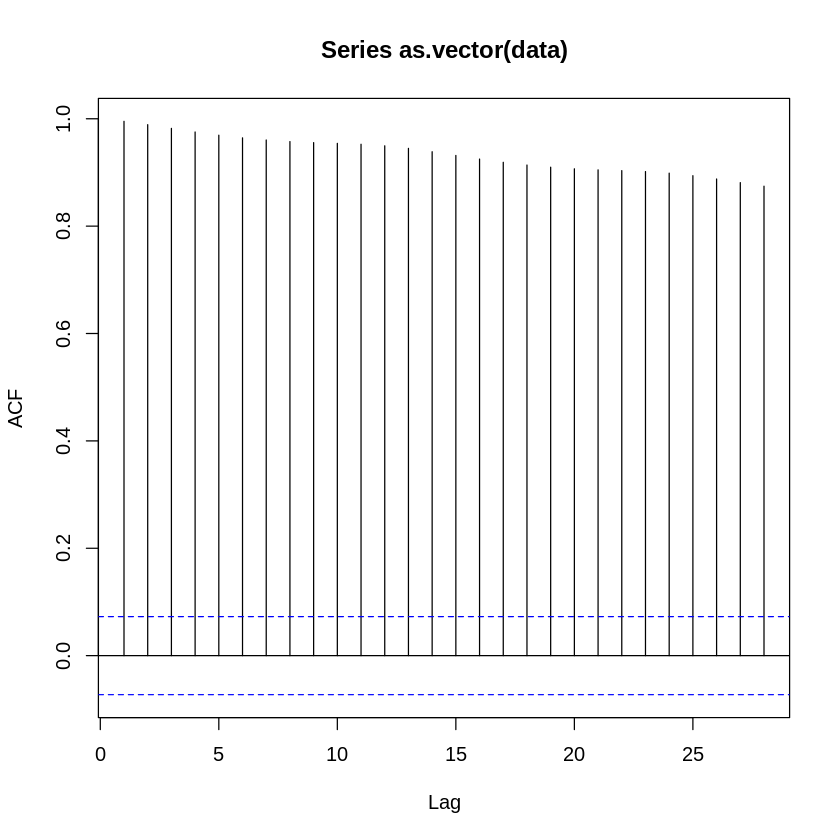

In [ ]:
acf(as.vector(data))

*By looking at the ACF plot which never dies or cuts off we can say that the data isn't stationary, we can also observe this because we can see a linear upward trend in the time series plot which shows that the mean isn't constant over time and it changes.So the original data isn't stationary.*

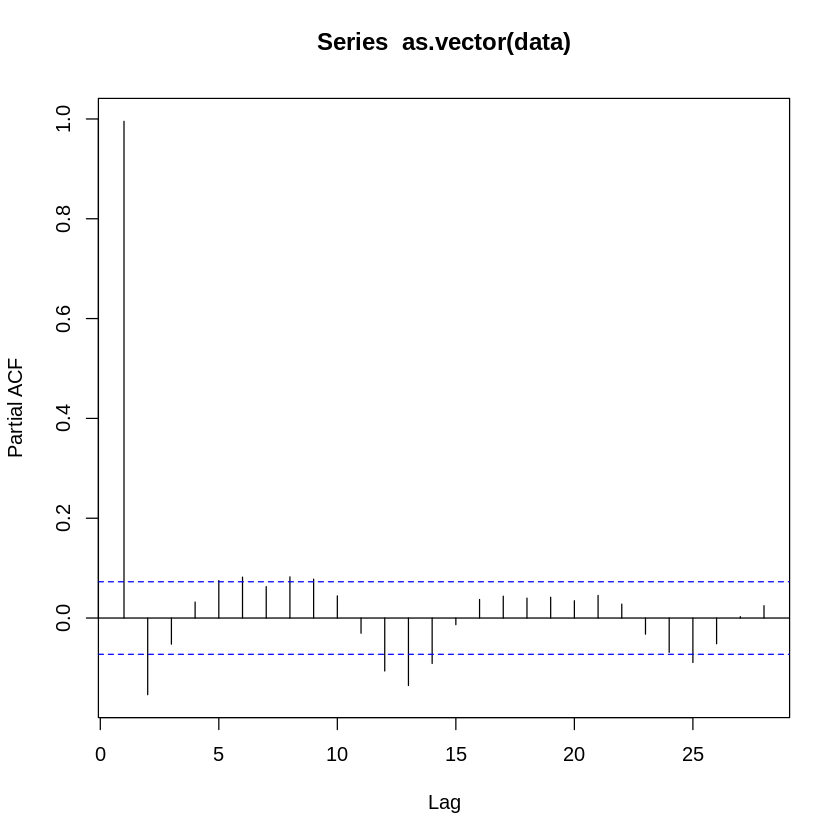

In [ ]:
pacf(as.vector(data))

In [ ]:
eacf(as.vector(data),ar.max=10,ma.max=10)

AR/MA
   0 1 2 3 4 5 6 7 8 9 10
0  x x x x x x x x x x x 
1  x x x x x x x x x x x 
2  x x x x x o x x x x x 
3  x x x x x o o x o x x 
4  x x x x x o o x o x o 
5  x o x o o o o x x x o 
6  x o x o x o o x o x o 
7  x x x x x o o o x x o 
8  x x x o o o x o x x o 
9  x x x x x o x o o x o 
10 x o x x x x x x x x o 


In [ ]:
adf.test(data)


	Augmented Dickey-Fuller Test

data:  data
Dickey-Fuller = -0.68514, Lag order = 8, p-value = 0.9719
alternative hypothesis: stationary


*As the data isn't stationary we have to try different methods to make the data stationary.After multiple tryouts, one seasonal difference and one non seasonal difference were required to make the original dataset stationary.*

In [ ]:
dat_d=diff(data)

In [ ]:
differenced_data = diff(dat_d, lag=12)

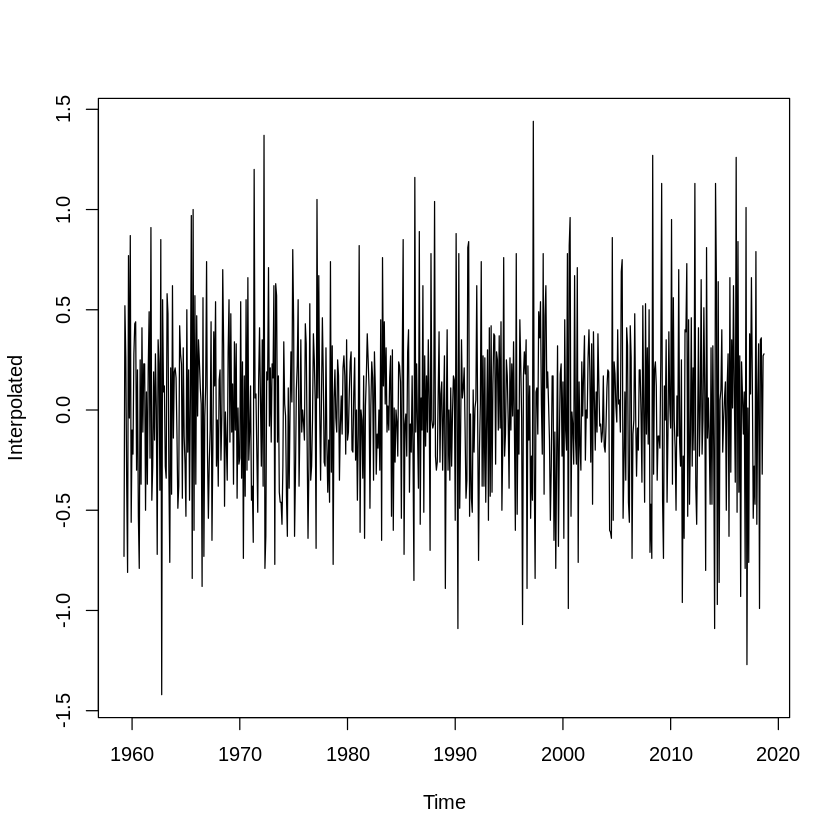

In [ ]:
# Seasonal difference
plot(diff(dat_d,lag=12))

*From the time series plot of differenced data we can observe that it looks statinary.*

In [ ]:
library(tseries)
adf.test(diff(diff(data),lag=12))

Warning message in adf.test(diff(diff(data), lag = 12)):
“p-value smaller than printed p-value”



	Augmented Dickey-Fuller Test

data:  diff(diff(data), lag = 12)
Dickey-Fuller = -8.8043, Lag order = 8, p-value = 0.01
alternative hypothesis: stationary


*We consider Dickey - Fuller test to test whether the data is stationary or not.Observing the p- value we can say that the data is stationary.*

*Even the ACF plot suggests the same that the differenced data looks stationary.*

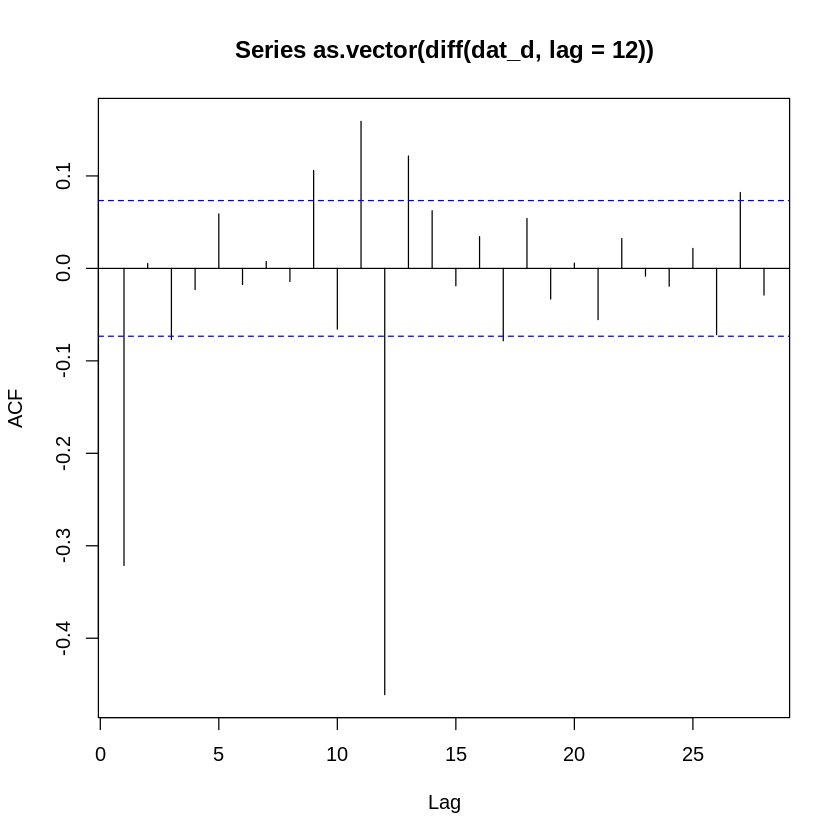

In [ ]:
acf(as.vector(diff(dat_d,lag=12)))

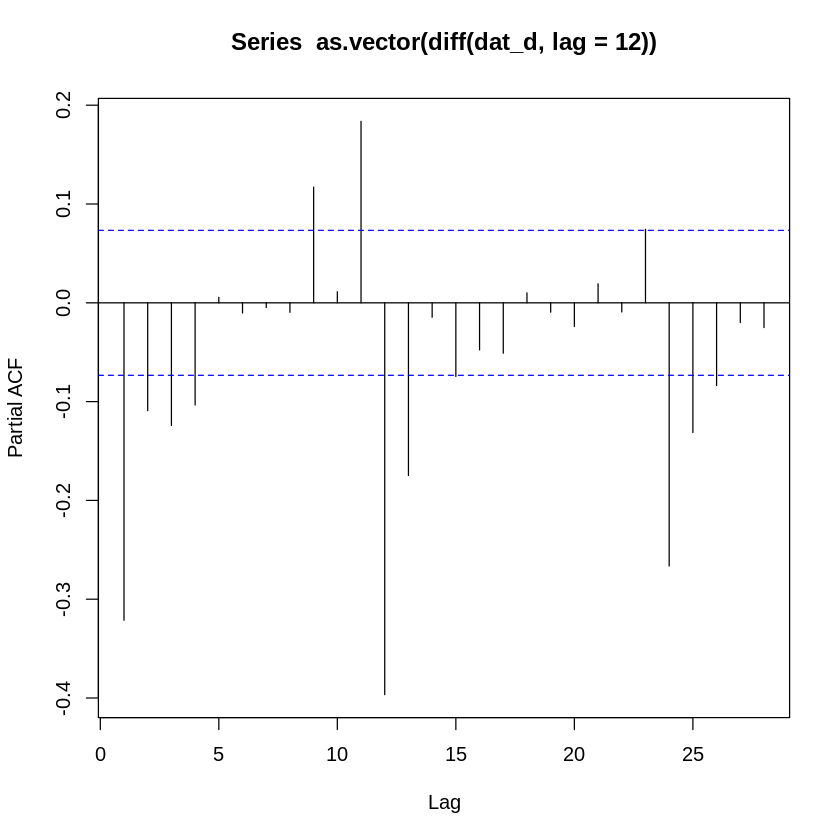

In [ ]:
pacf(as.vector(diff(dat_d,lag=12)))

In [ ]:
eacf(as.vector(diff(dat_d,lag=12)))

AR/MA
  0 1 2 3 4 5 6 7 8 9 10 11 12 13
0 x o x o o o o o x o x  x  x  o 
1 x o o o o o o o x o o  x  x  x 
2 x x x o o o o o o o o  x  x  x 
3 x x x x o o o o o o o  x  x  x 
4 o x o x o o o o o o o  x  x  x 
5 x x o o x o o o o o o  x  x  x 
6 x x o o x o o o o o o  x  x  x 
7 x o o o o o o o o o o  x  o  x 


*From ACF plot: We can see that there is only one season and it has 2 or 3 lags significantly outside the confidence interval and 2 seasons with 1 lag significantly outside the confidence interval. So, the seasonal component is either 1 or 2 and we can have q= 1 or 2 or 3 in the non-seasonal component depending on parameter redundancy.*

*From PACF plot: We can see that there is either 1 season with 2 lags significanlty outside the confidence interval or 2 seasons with 1 lag significantly outside the confidence interval.So, we can cinsider the seasonal component as 1 or 2 and non seasonal component q = 1 or 2 depending on the parameter redundancy.*

*From EACF: EACF suggests that*

1.   ARMA(1,1)
2.   ARMA(1,2) *can be considered for non - seasonal ARIMA* 



**Models for Analysis:**



*   SARIMA(1,0,1)(2,0,2)[12]
*   SARIMA(2,0,1)(1,0,1)[12]
*   SARIMA(1,0,2)(1,0,1)[12]



In [ ]:
model1 = arima(differenced_data, order=c(2,0,1), seasonal=list(order=c(1,0,1), period=12))
model1


Call:
arima(x = differenced_data, order = c(2, 0, 1), seasonal = list(order = c(1, 
    0, 1), period = 12))

Coefficients:
         ar1    ar2      ma1    sar1     sma1  intercept
      0.3614  0.091  -0.7362  0.0092  -0.8872     0.0023
s.e.  0.1101  0.061   0.0998  0.0422   0.0198     0.0007

sigma^2 estimated as 0.09405:  log likelihood = -178.53,  aic = 369.05

In [ ]:
bic=AIC(model1,k = log(length(differenced_data)))
print(bic)

[1] 403.0496


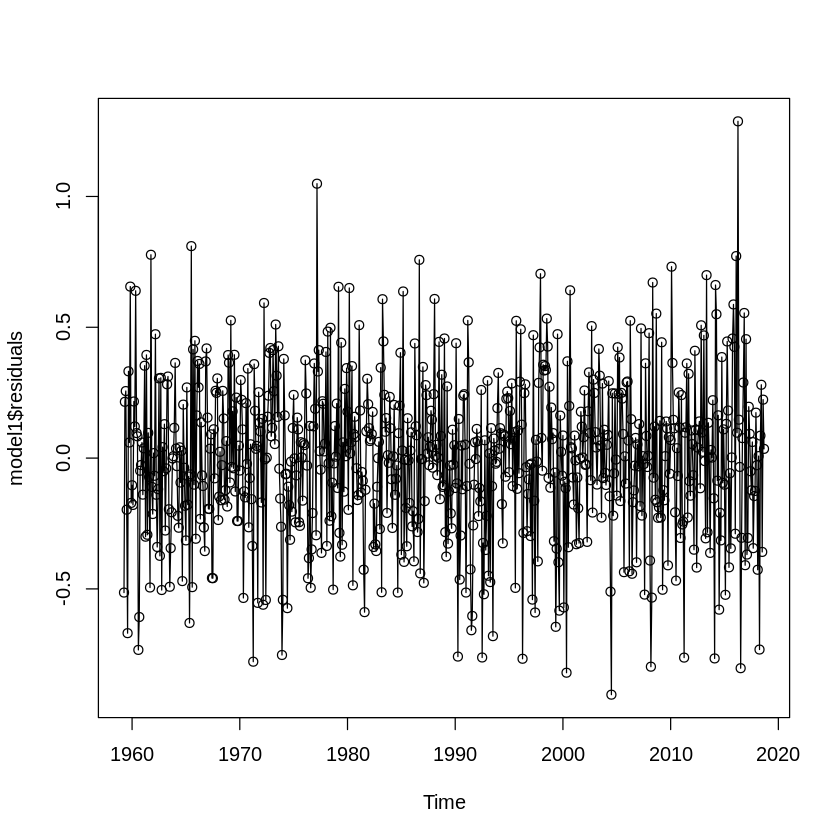

In [ ]:
plot(model1$residuals,type='o')

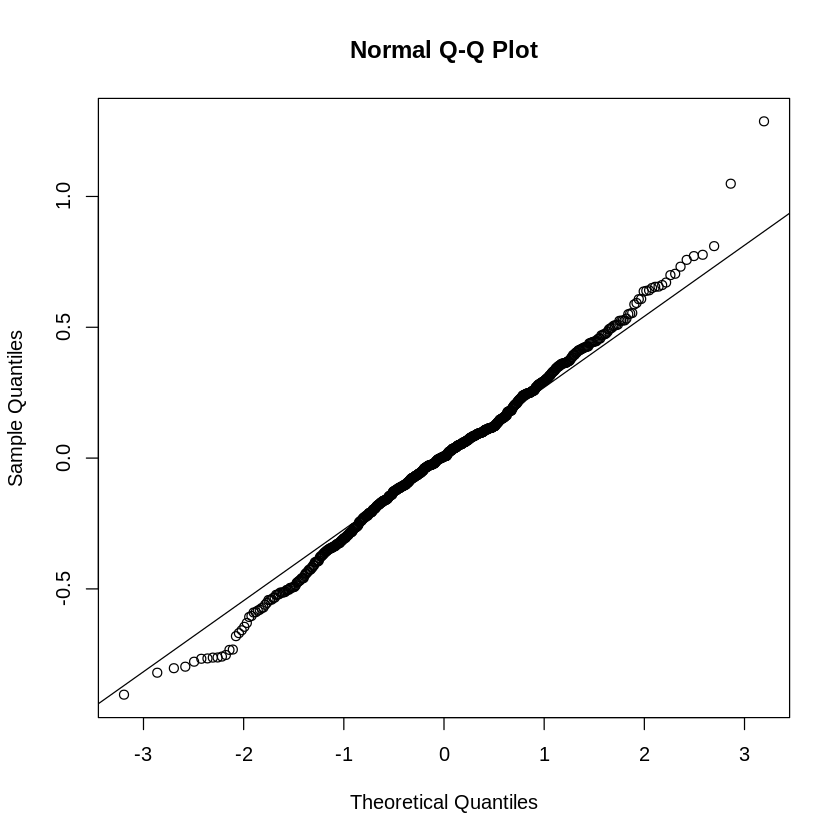

In [ ]:
qqnorm(model1$residuals)
qqline(model1$residuals)

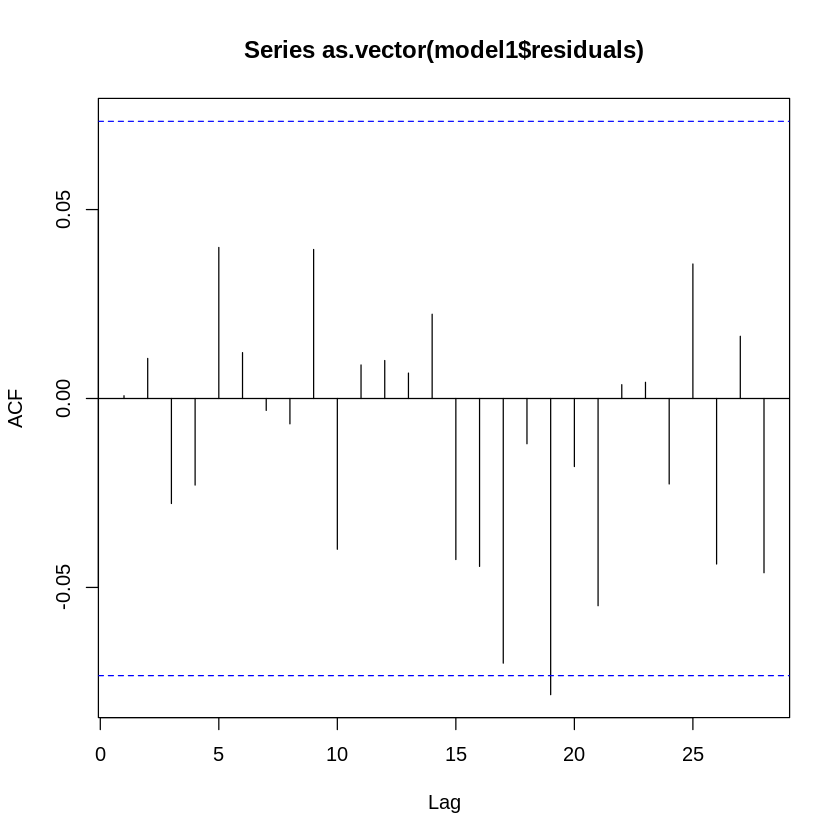

In [ ]:
acf(as.vector(model1$residuals))

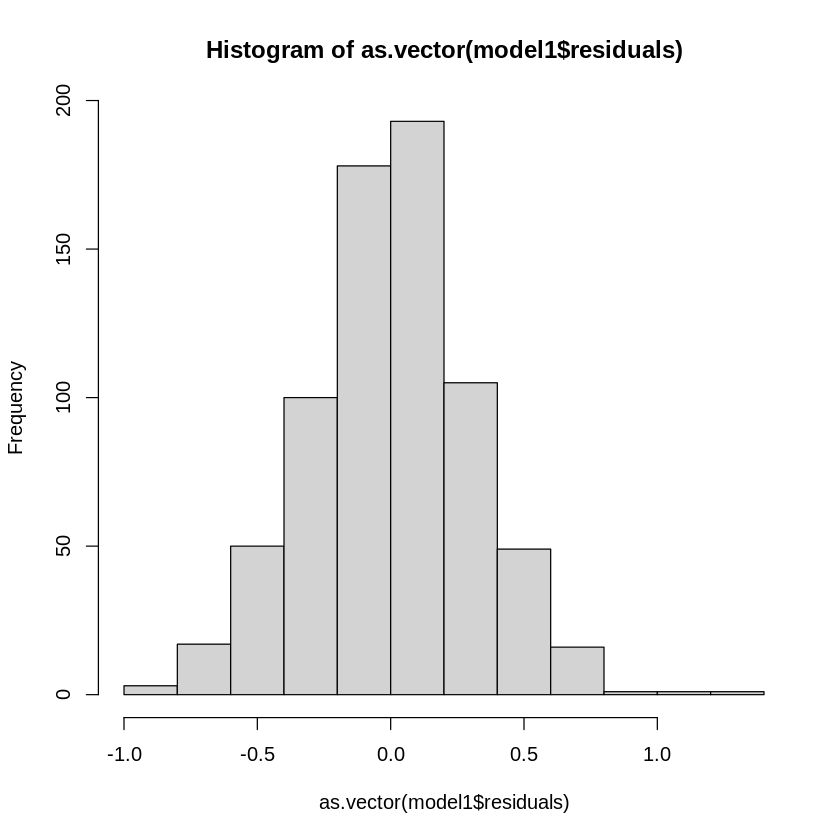

In [ ]:
hist(as.vector(model1$residuals))

In [ ]:
shapiro.test(model1$residuals)


	Shapiro-Wilk normality test

data:  model1$residuals
W = 0.99508, p-value = 0.02179


In [ ]:
model2 = arima(differenced_data, order=c(1,0,1), seasonal=list(order=c(2,0,2), period=12))
model2


Call:
arima(x = differenced_data, order = c(1, 0, 1), seasonal = list(order = c(2, 
    0, 2), period = 12))

Coefficients:
         ar1      ma1     sar1     sar2     sma1     sma2  intercept
      0.2441  -0.6122  -0.2418  -0.0387  -0.6347  -0.2121     0.0023
s.e.  0.0940   0.0773   0.8988   0.0436   0.8989   0.7940     0.0008

sigma^2 estimated as 0.09427:  log likelihood = -179.23,  aic = 372.46

In [ ]:
bic=AIC(model2,k = log(length(differenced_data)))
print(bic)

[1] 411.0228


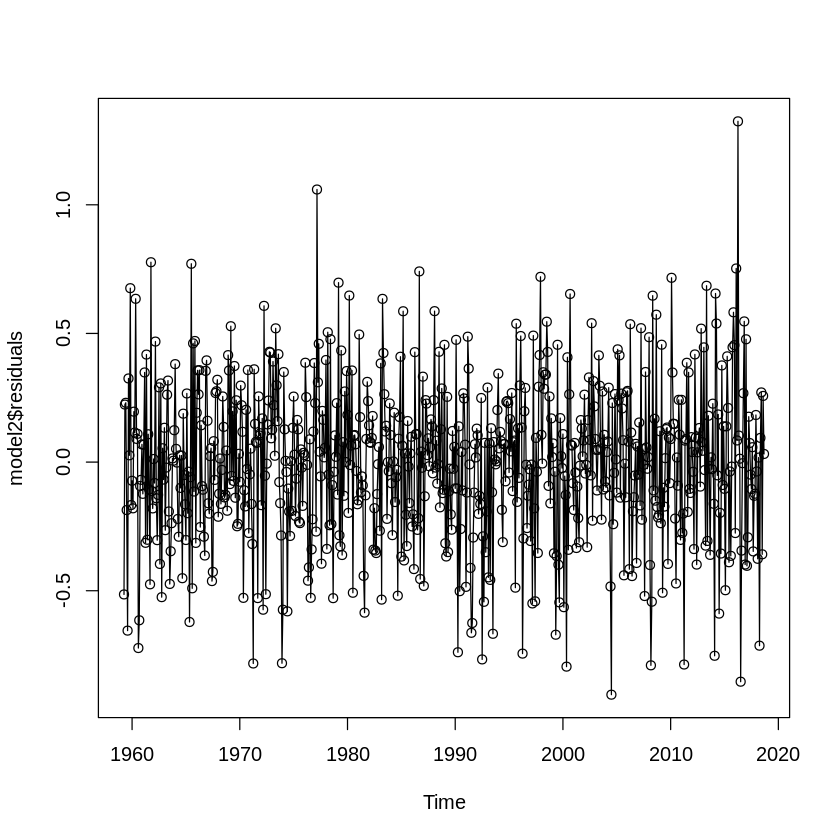

In [ ]:
plot(model2$residuals,type='o')

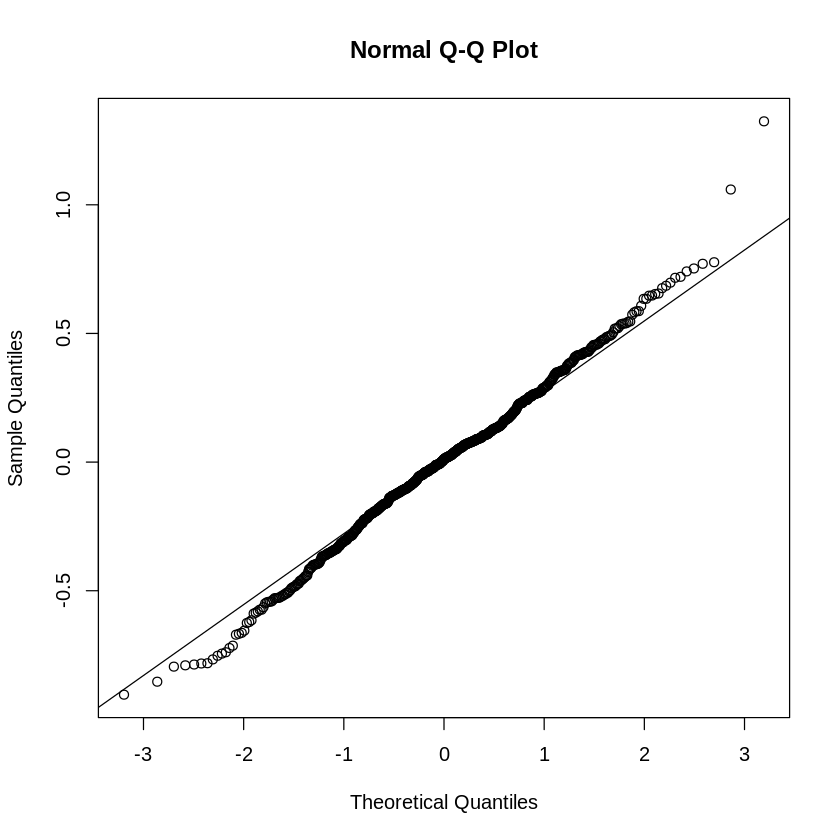

In [ ]:
qqnorm(model2$residuals)
qqline(model2$residuals)

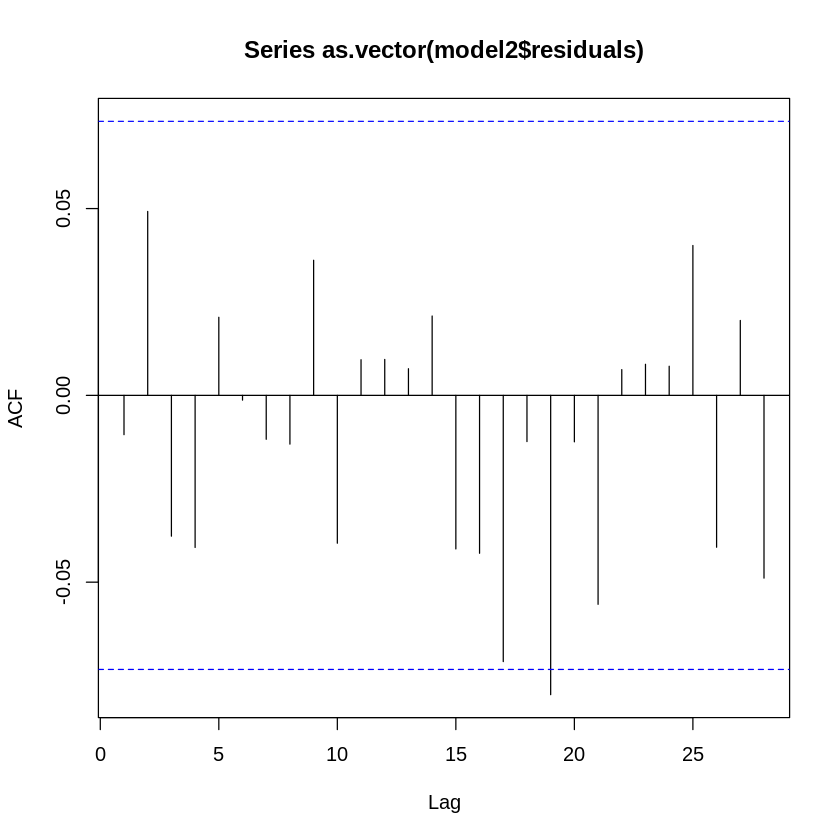

In [ ]:
acf(as.vector(model2$residuals))

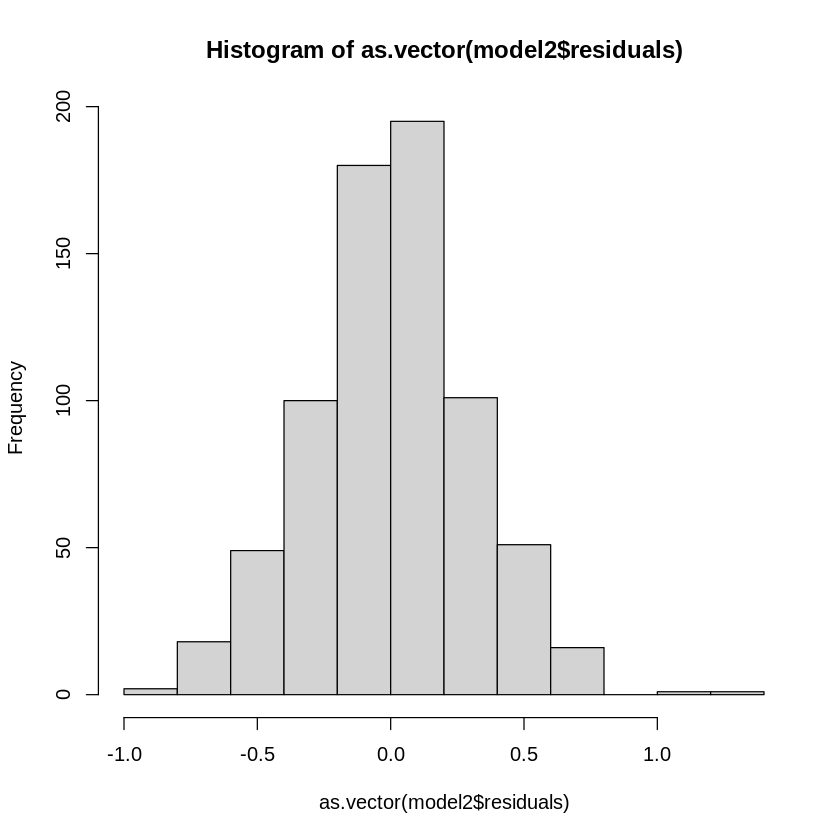

In [ ]:
hist(as.vector(model2$residuals))

In [ ]:
shapiro.test(model2$residuals)


	Shapiro-Wilk normality test

data:  model2$residuals
W = 0.99495, p-value = 0.01872


In [ ]:
model3 = arima(differenced_data, order=c(1,0,2), seasonal=list(order=c(1,0,1), period=12))
model3


Call:
arima(x = differenced_data, order = c(1, 0, 2), seasonal = list(order = c(1, 
    0, 1), period = 12))

Coefficients:
         ar1      ma1     ma2    sar1     sma1  intercept
      0.5800  -0.9499  0.1521  0.0089  -0.8868     0.0023
s.e.  0.2689   0.2727  0.1266  0.0423   0.0198     0.0007

sigma^2 estimated as 0.09416:  log likelihood = -178.9,  aic = 369.8

In [ ]:
bic=AIC(model3,k = log(length(differenced_data)))
print(bic)

[1] 403.7959


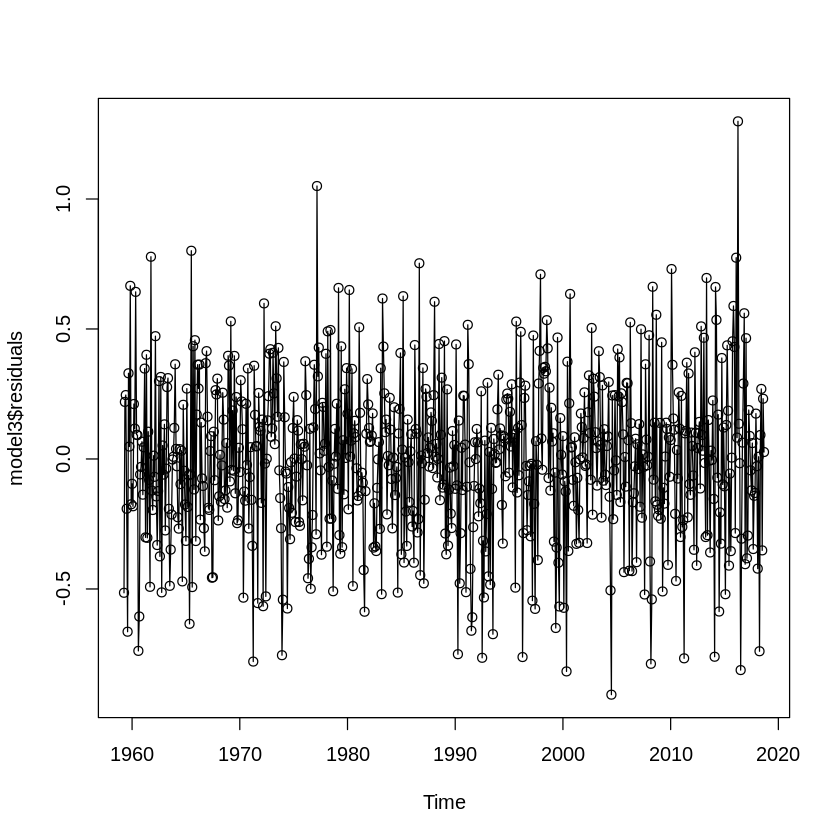

In [ ]:
plot(model3$residuals,type='o')

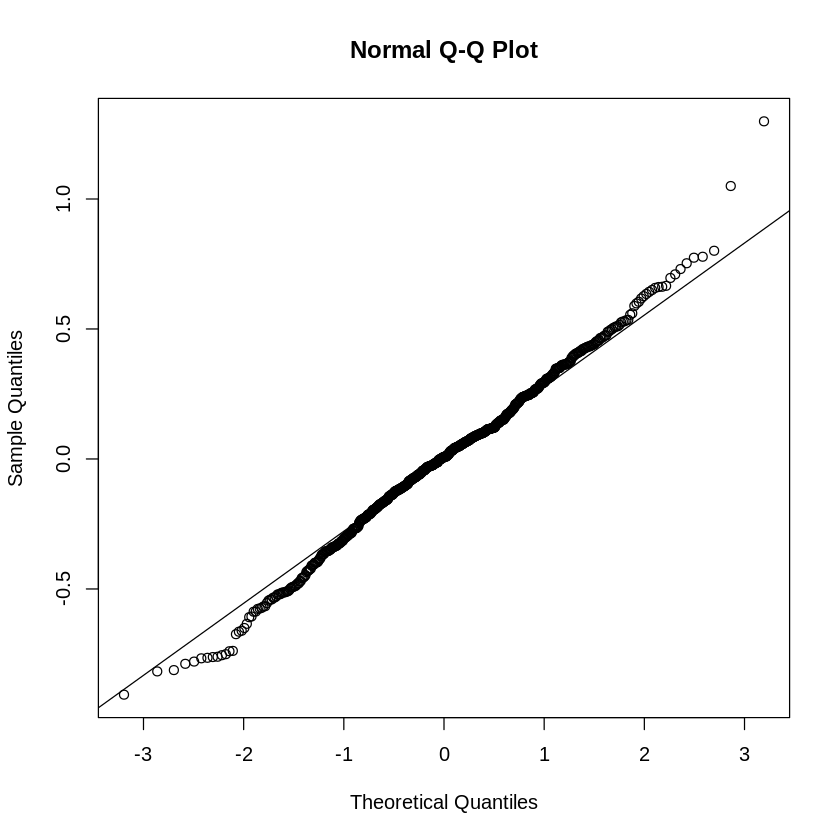

In [ ]:
qqnorm(model3$residuals)
qqline(model3$residuals)

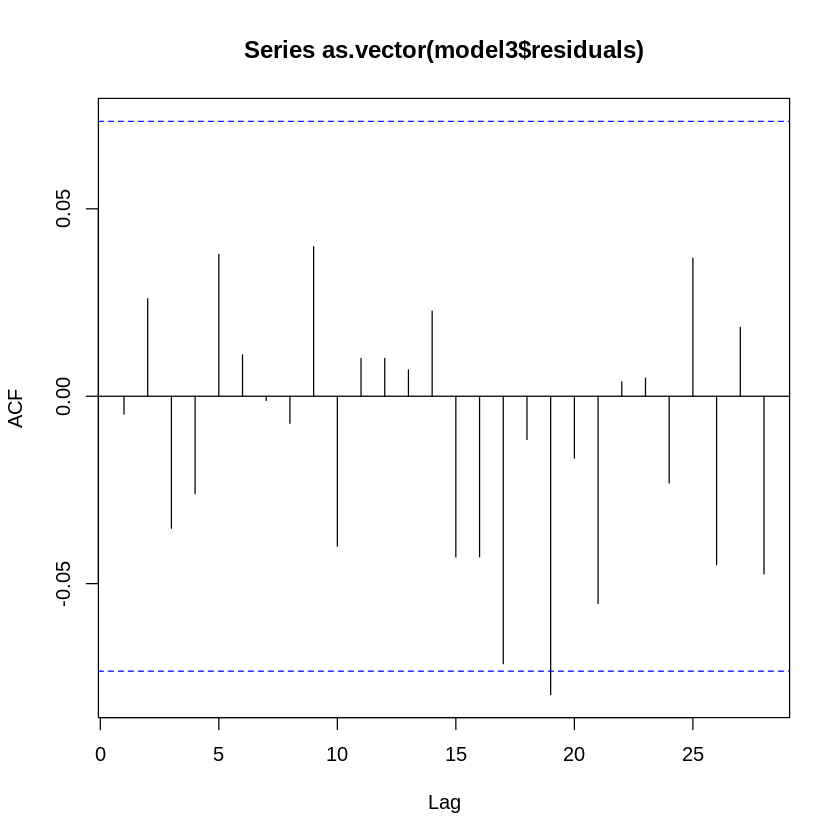

In [ ]:
acf(as.vector(model3$residuals))

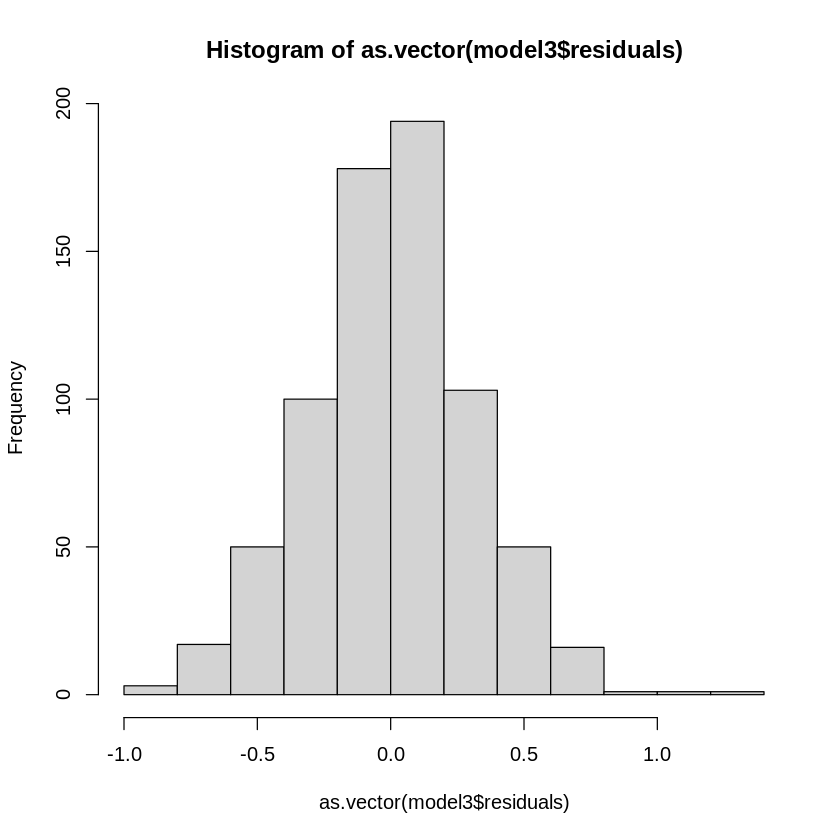

In [ ]:
hist(as.vector(model3$residuals))

In [ ]:
shapiro.test(model3$residuals)


	Shapiro-Wilk normality test

data:  model3$residuals
W = 0.99502, p-value = 0.02036


*Residuals capture all the information of the data.A suitable model will yield residuals with the following properties:*

*1) The residuals are independent.*

*2) The residuals form stationary series.*

*We check ACF for any dependency in residuals. And check histogram and qqplots and Shapiro Wilk Test for normality.*

*All the above models show that the residuals are independent and and follow approximately normal distribution.*

*By checking all the models we can see that there is not a lot of difference between them so we can choose any of the models that were selected above. So, lets consider the model with least BIC and AIC values.*

*SARIMA(2,0,1)(1,0,1)[12] for Differenced Data*


*SARIMA(2,1,1)(1,1,1)[12] for Original Data*

*Forecasting should be done on original data.*

In [ ]:
model1f = arima(data, order=c(2,1,1), seasonal=list(order=c(1,1,1), period=12))
model1f$x=data
model1f


Call:
arima(x = data, order = c(2, 1, 1), seasonal = list(order = c(1, 1, 1), period = 12))

Coefficients:
         ar1     ar2      ma1    sar1     sma1
      0.2917  0.0694  -0.6622  0.0054  -0.8699
s.e.  0.1096  0.0587   0.1011  0.0426   0.0205

sigma^2 estimated as 0.09529:  log likelihood = -182.39,  aic = 374.78

*forecast() method can be used from the forecast library to predict the future values.*

In [ ]:
f<-forecast(model1f,level=c(95),h=24)
f

         Point Forecast    Lo 95    Hi 95
Oct 2018       405.7439 405.1389 406.3489
Nov 2018       407.2669 406.5520 407.9818
Dec 2018       408.7264 407.9271 409.5257
Jan 2019       409.9204 409.0537 410.7871
Feb 2019       410.6155 409.6892 411.5419
Mar 2019       411.5467 410.5657 412.5278
Apr 2019       413.0023 411.9699 414.0346
May 2019       413.6596 412.5787 414.7406
Jun 2019       412.9254 411.7980 414.0528
Jul 2019       411.1820 410.0101 412.3539
Aug 2019       409.1290 407.9141 410.3438
Sep 2019       407.6708 406.4145 408.9270
Oct 2019       407.9337 406.6147 409.2527
Nov 2019       409.4667 408.0964 410.8371
Dec 2019       410.9299 409.5109 412.3489
Jan 2020       412.1263 410.6610 413.5915
Feb 2020       412.8242 411.3143 414.3340
Mar 2020       413.7549 412.2019 415.3080
Apr 2020       415.2141 413.6191 416.8091
May 2020       415.8696 414.2338 417.5055
Jun 2020       415.1339 413.4582 416.8096
Jul 2020       413.3924 411.6777 415.1070
Aug 2020       411.3375 409.5848 4

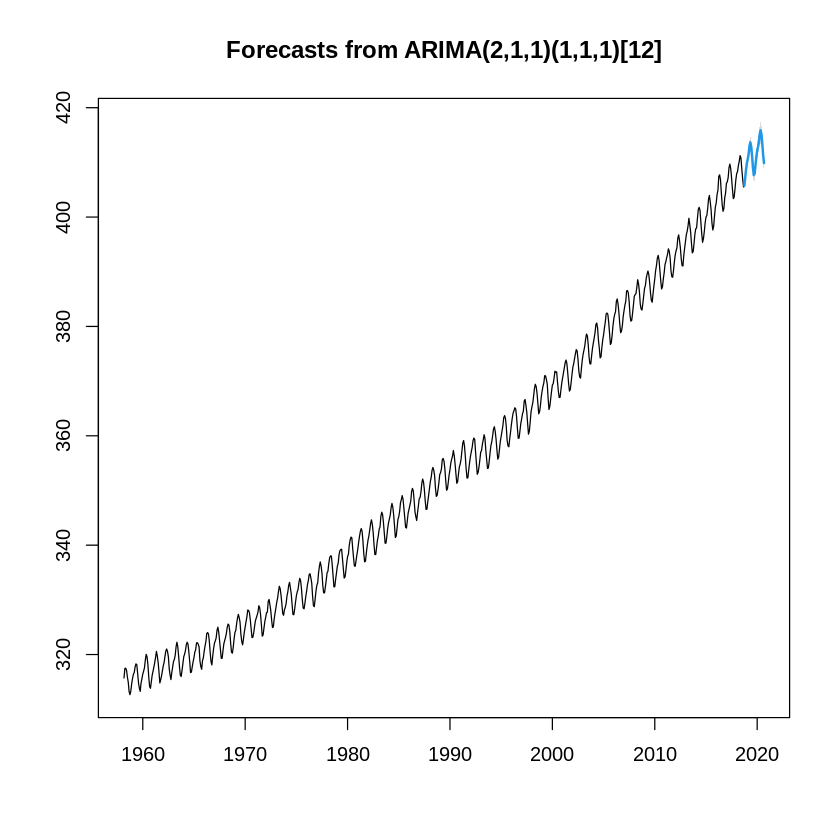

In [ ]:
plot(f)

**Conclusion:**

*The model SARIMA(2,1,1)(1,1,1)[12] on the actual time series data did perform well to predict the future Carbon dioxide emissions for 2 years.The model may not be same as the model that the ACF and PACF plots suggest as we did reduce the parameters to lessen the complexity involved.The model chosen has lesser parametrs with adequate information of the timeseries to forecast the future.We can observe that it follows the pattern annually and also the linear upwards trend.So, we can say that the emissions are going to increase in the future and they do follow a annual seasonality pattern.*

**Non Seasonal Dataset:**

* bold textMonthly sales of the drugs in 8 ATC categories, by the single pharmacy store in period of 6 years (last year incomplete). In this section we are going to implement univariate Time series Analysis. For this we will be selecting the M01AB column which consists of Sales volume of anti-inflammatory and antirheumatic products, non-steroids, Acetic acid derivatives and related substances. The dataset is a monthly Data and non-seasonal.*

*Data Source* - https://www.kaggle.com/code/milanzdravkovic/pharma-sales-data-analysis-and-forecasting/data?select=salesmonthly.csv



In [ ]:
ns_data<-read.csv('/content/salesmonthly.csv') 

In [ ]:
head(ns_data)

,datum,M01AB,M01AE,N02BA,N02BE,N05B,N05C,R03,R06
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2014-01-31,127.69,99.090,152.100,878.030,354,50,112,48.2
2,2014-02-28,133.32,126.050,177.000,1001.900,347,31,122,36.2
3,2014-03-31,137.44,92.950,147.655,779.275,232,20,112,85.4
4,2014-04-30,113.10,89.475,130.900,698.500,209,18,97,73.7
5,2014-05-31,101.79,119.933,132.100,628.780,270,23,107,123.7
6,2014-06-30,112.07,94.710,122.900,548.225,323,23,57,109.3


In [ ]:
summary(ns_data)

    datum               M01AB           M01AE           N02BA       
 Length:70          Min.   :  0.0   Min.   :  0.0   Min.   :  0.00  
 Class :character   1st Qu.:137.5   1st Qu.:103.5   1st Qu.: 94.38  
 Mode  :character   Median :154.6   Median :114.8   Median :117.22  
                    Mean   :150.0   Mean   :116.5   Mean   :115.02  
                    3rd Qu.:169.0   3rd Qu.:128.4   3rd Qu.:133.84  
                    Max.   :211.1   Max.   :222.4   Max.   :191.60  
     N02BE             N05B            N05C            R03       
 Min.   :   0.0   Min.   :  1.0   Min.   : 0.00   Min.   :  0.0  
 1st Qu.: 648.2   1st Qu.:223.8   1st Qu.:12.00   1st Qu.:112.0  
 Median : 865.8   Median :250.3   Median :18.00   Median :160.0  
 Mean   : 892.5   Mean   :262.1   Mean   :17.84   Mean   :167.7  
 3rd Qu.:1061.6   3rd Qu.:293.6   3rd Qu.:23.00   3rd Qu.:218.2  
 Max.   :1856.8   Max.   :492.0   Max.   :50.00   Max.   :386.0  
      R06        
 Min.   :  0.00  
 1st Qu.: 49.88  
 

In [ ]:
temp = ns_data$M01AE

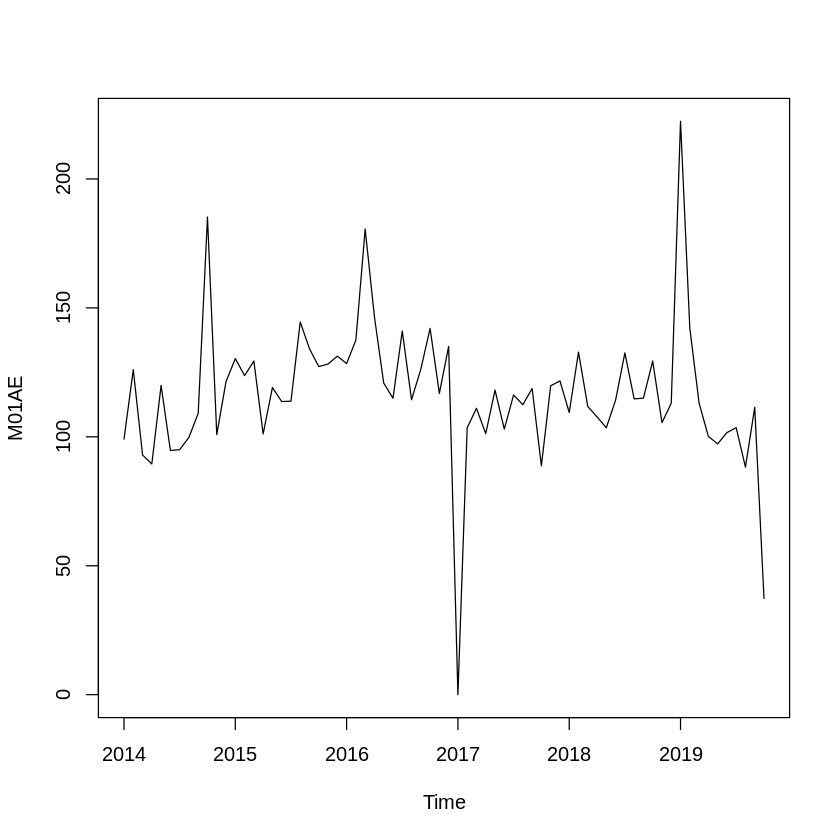

In [ ]:
dat<-ts(temp,frequency=12,start=c(2014,1))
plot(window(dat,start=c(2014,1)),ylab='M01AE')

*The time series doesn't look stationary but lets confirm it with the help of ACF and Dickey Fuller test.*

In [ ]:
library(tseries)
adf.test(dat)


	Augmented Dickey-Fuller Test

data:  dat
Dickey-Fuller = -2.3847, Lag order = 4, p-value = 0.4188
alternative hypothesis: stationary


*The Dickey Fuller test accepts Null Hypothesis which implies that the Data is not stationary.*

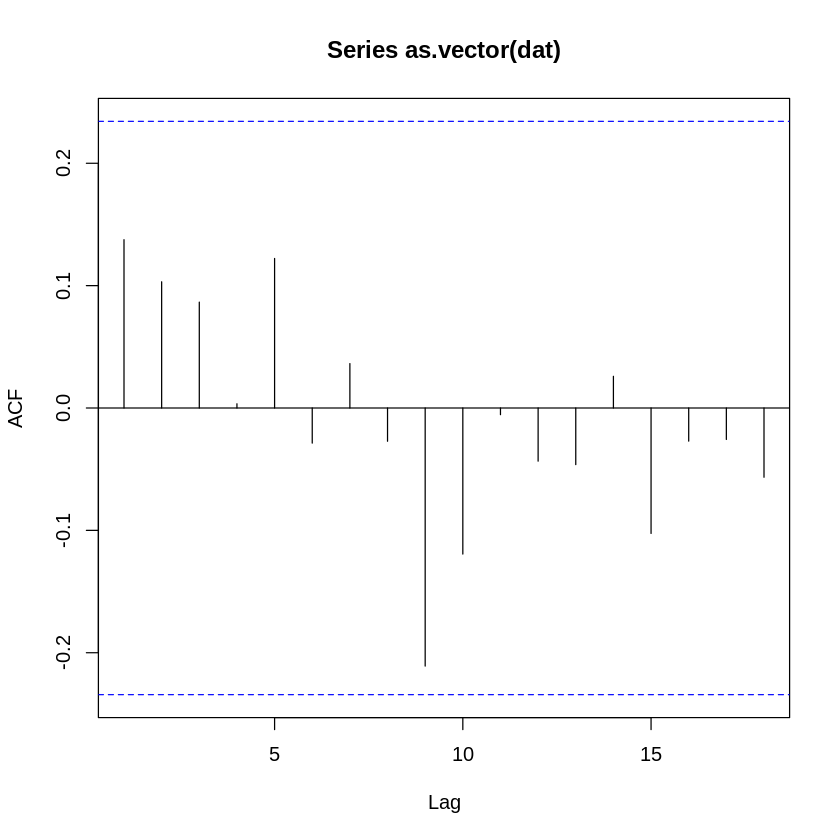

In [ ]:
# acf(as.vector(dat))
acf(as.vector(dat))

*By looking at the ACF plot,So the original data looks stationary but DF test contradicts it.*

*As the data isn't stationary we have to try different methods to make the data 
stationary.After one difference the data can be made stationary.*

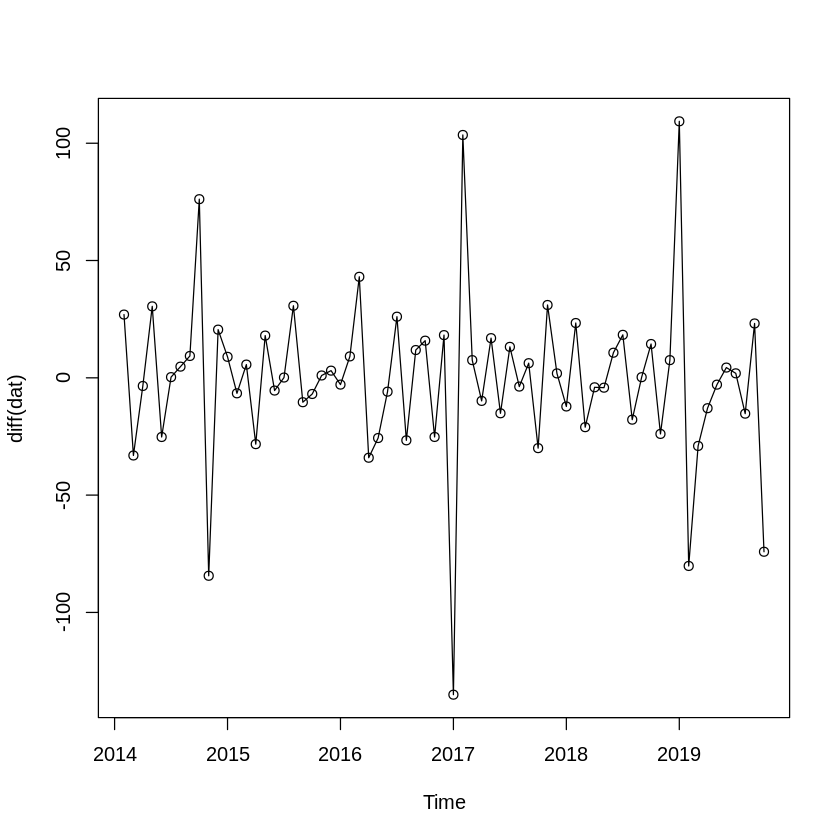

In [ ]:
plot(diff(dat),type='o')

*From the time series plot of differenced data we can observe that it looks stationary.*

In [ ]:
library(tseries)
temp_diff = diff(dat)
adf.test(temp_diff)

Warning message in adf.test(temp_diff):
“p-value smaller than printed p-value”



	Augmented Dickey-Fuller Test

data:  temp_diff
Dickey-Fuller = -5.2936, Lag order = 4, p-value = 0.01
alternative hypothesis: stationary


*We consider Dickey - Fuller test to test whether the data is stationary or not.Observing the p- value we can say that the data is stationary.*

*Even the ACF plot suggests the same that the differenced data looks stationary.*

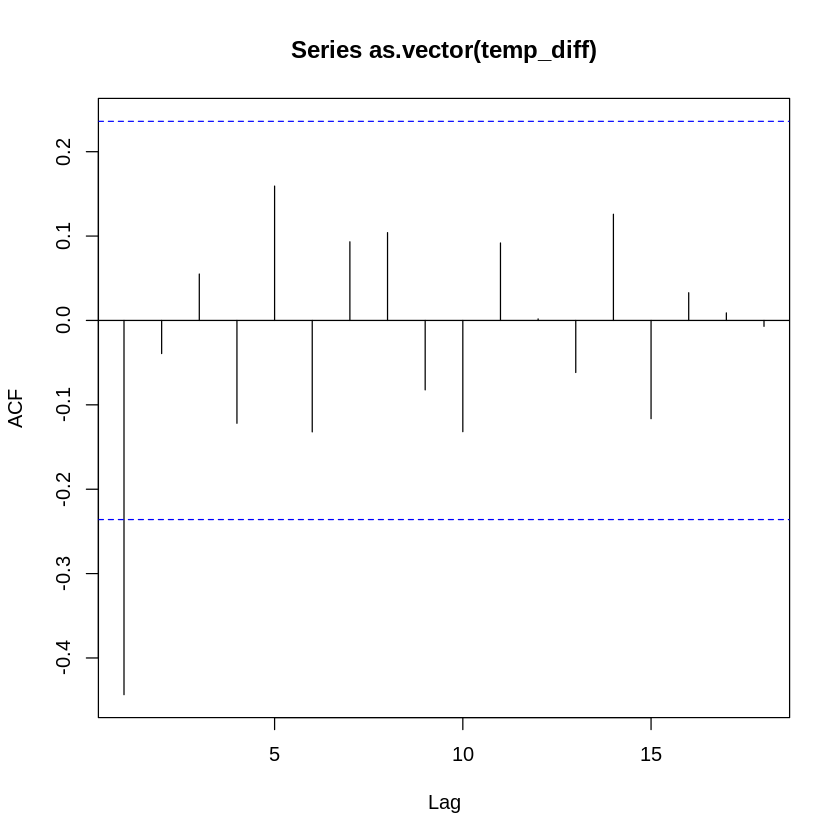

In [ ]:
acf(as.vector(temp_diff))

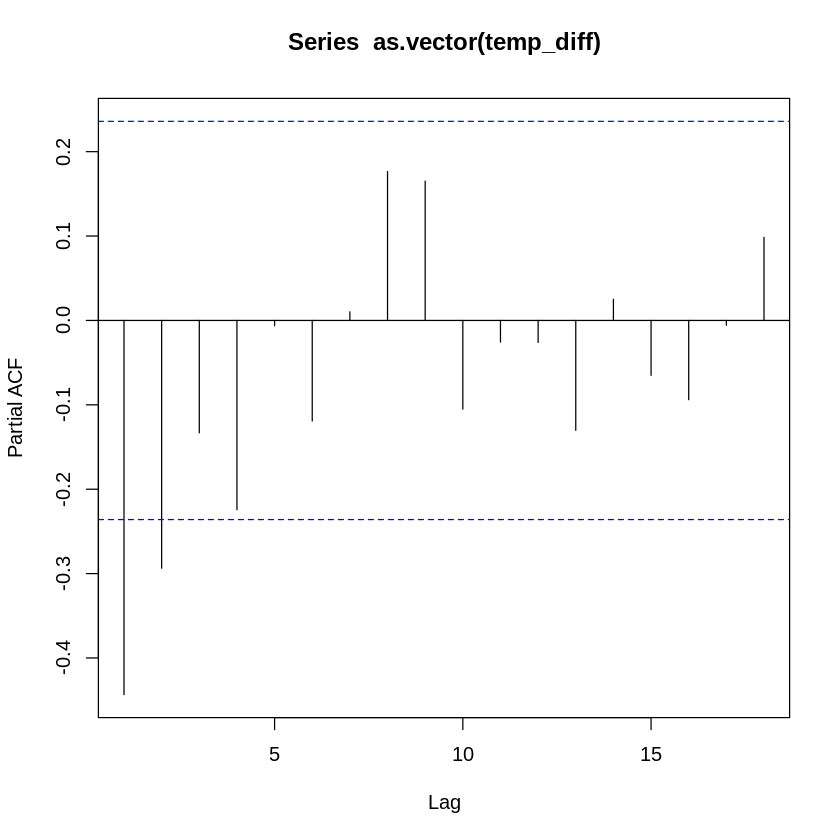

In [ ]:
pacf(as.vector(temp_diff))

In [ ]:
eacf(as.vector(temp_diff))

AR/MA
  0 1 2 3 4 5 6 7 8 9 10 11 12 13
0 x o o o o o o o o o o  o  o  o 
1 x x o o o o o o o o o  o  o  o 
2 x x o o o o o o o o o  o  o  o 
3 x x x x o o o o o o o  o  o  o 
4 o x o o o o o o o o o  o  o  o 
5 o x o o o o o o o o o  o  o  o 
6 o x o o o x o o o o o  o  o  o 
7 o x o o o x o o o o o  o  o  o 


*From ACF plot: We can see that it has 1 lag significantly outside the confidence interval.So,we can have q= 1.*

*From PACF plot: We can see that it has 1 or 2 lags significantly outside the confidence interval.So,we can have p= 1 or 2 depending on parameter redundancy.*

*EACF suggests these models:*

**ARMA(1,1)**


**ARMA(2,1)**

*We follow the Residual Analysis the same way we did in Seasonal Data Analysis.*

In [ ]:
m1=arima(temp_diff,order=c(1,0,1))
print(m1)


Call:
arima(x = temp_diff, order = c(1, 0, 1))

Coefficients:
         ar1      ma1  intercept
      0.1689  -1.0000    -0.1445
s.e.  0.1273   0.0537     0.1943

sigma^2 estimated as 755:  log likelihood = -328.49,  aic = 662.97


In [ ]:
bic=AIC(m1,k = log(length(temp_diff)))
print(bic)

[1] 673.9083


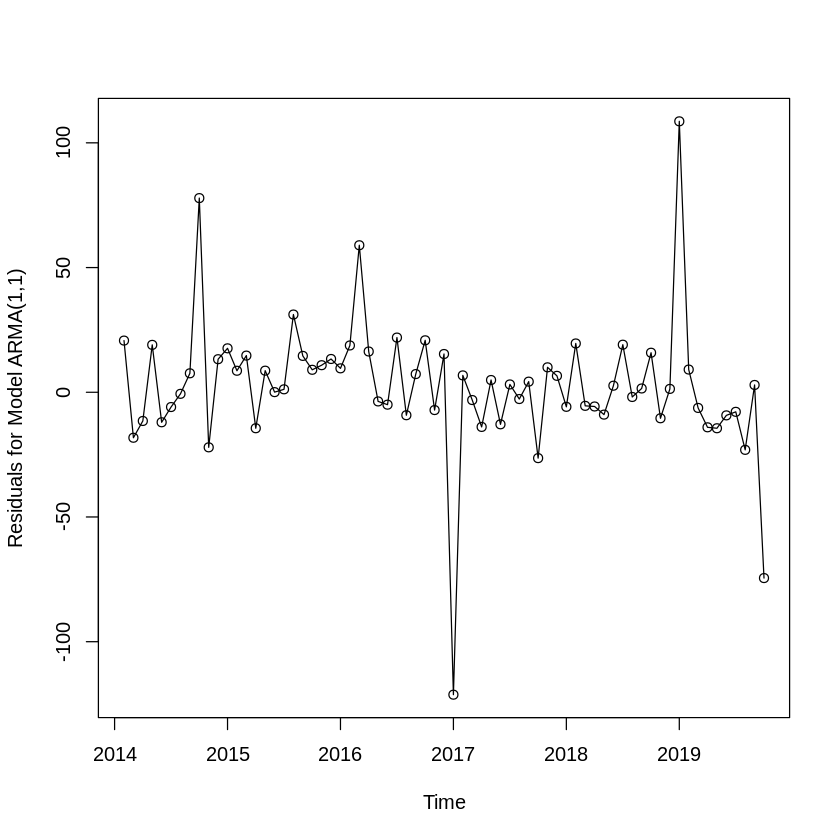

In [ ]:
plot(m1$residuals,type='o',ylab='Residuals for Model ARMA(1,1)')

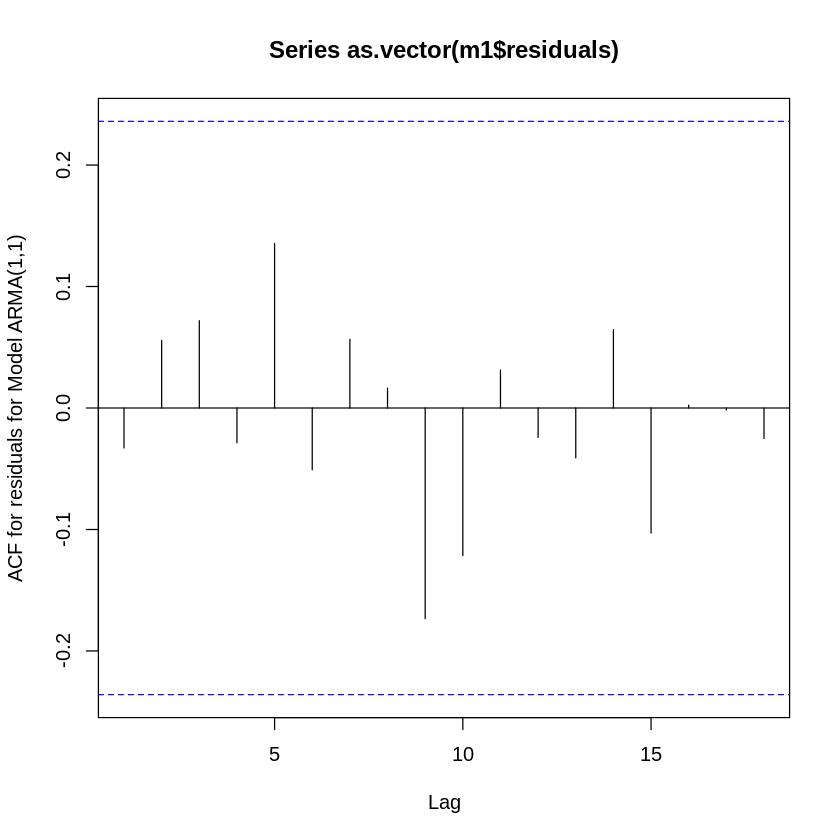

In [ ]:
acf(as.vector(m1$residuals),ylab='ACF for residuals for Model ARMA(1,1)')

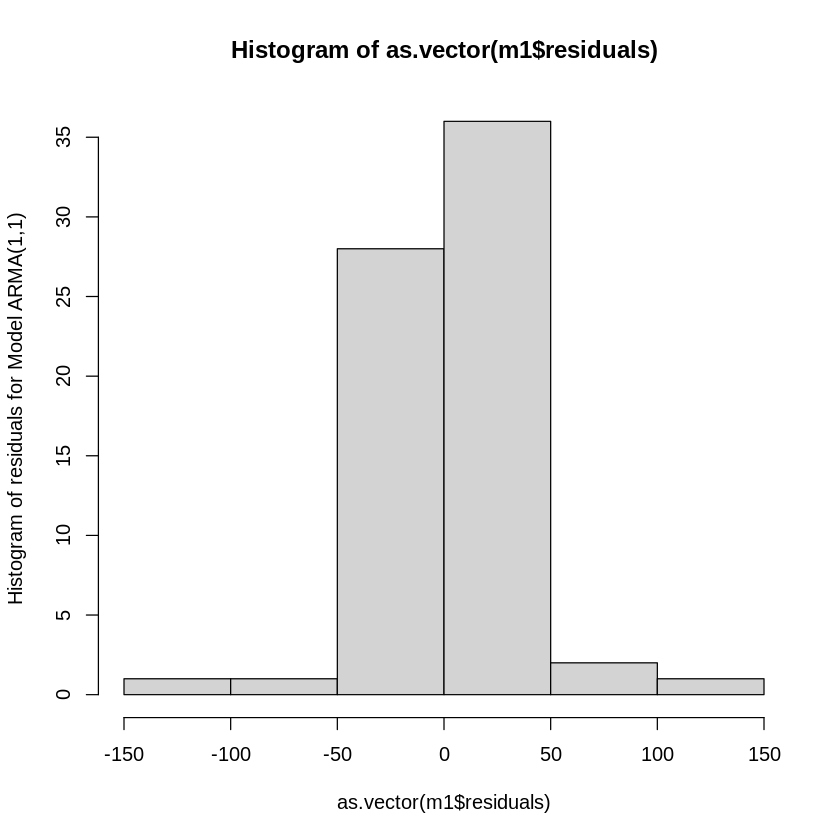

In [ ]:
hist(as.vector(m1$residuals),ylab='Histogram of residuals for Model ARMA(1,1)')

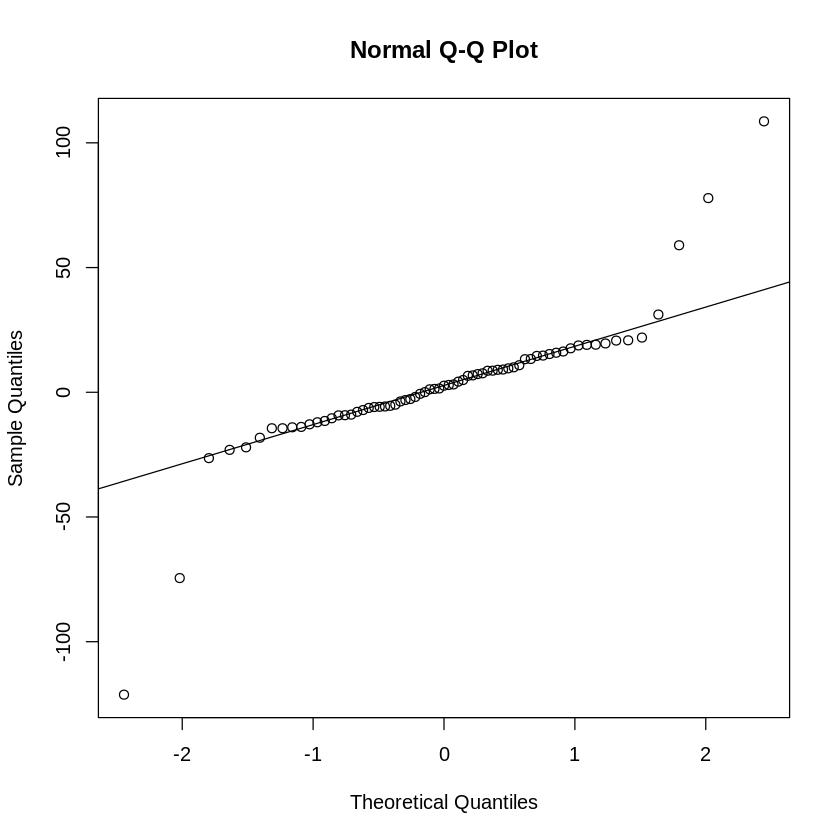

In [ ]:
qqnorm(m1$residuals)
qqline(m1$residuals)

In [ ]:
print(shapiro.test(m1$residuals))


	Shapiro-Wilk normality test

data:  m1$residuals
W = 0.7888, p-value = 1.446e-08



In [ ]:
m2=arima(temp_diff,order=c(2,0,1))
print(m2)


Call:
arima(x = temp_diff, order = c(2, 0, 1))

Coefficients:
         ar1     ar2      ma1  intercept
      0.1546  0.1085  -1.0000    -0.1553
s.e.  0.1279  0.1271   0.0489     0.2161

sigma^2 estimated as 749.3:  log likelihood = -328.12,  aic = 664.24


In [ ]:
bic=AIC(m2,k = log(length(temp_diff)))
print(bic)

[1] 677.4148


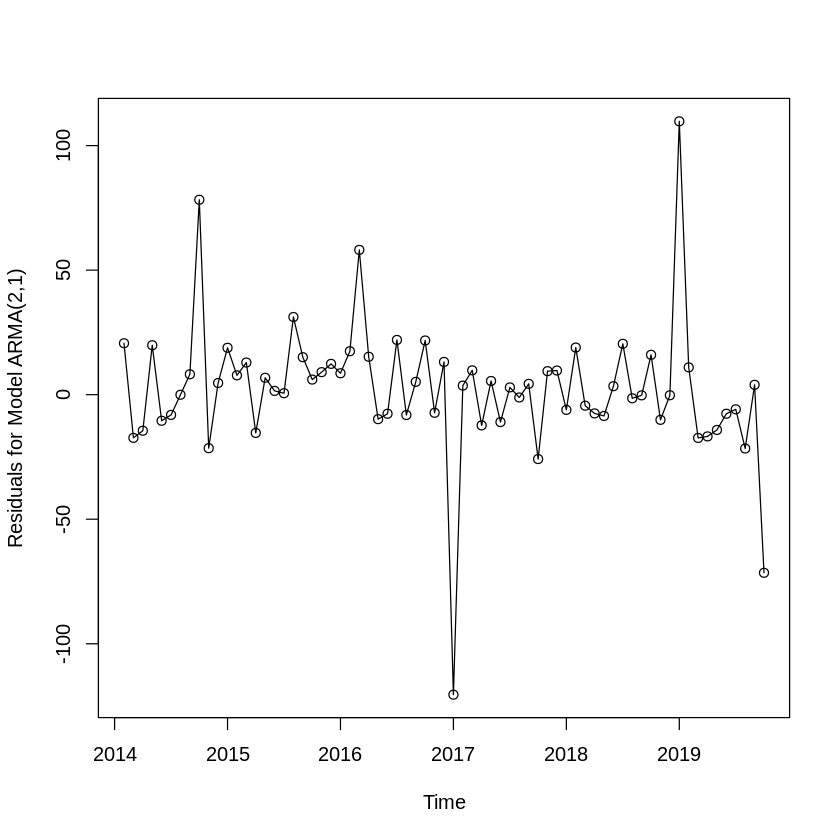

In [ ]:
plot(m2$residuals,type='o',ylab='Residuals for Model ARMA(2,1)')

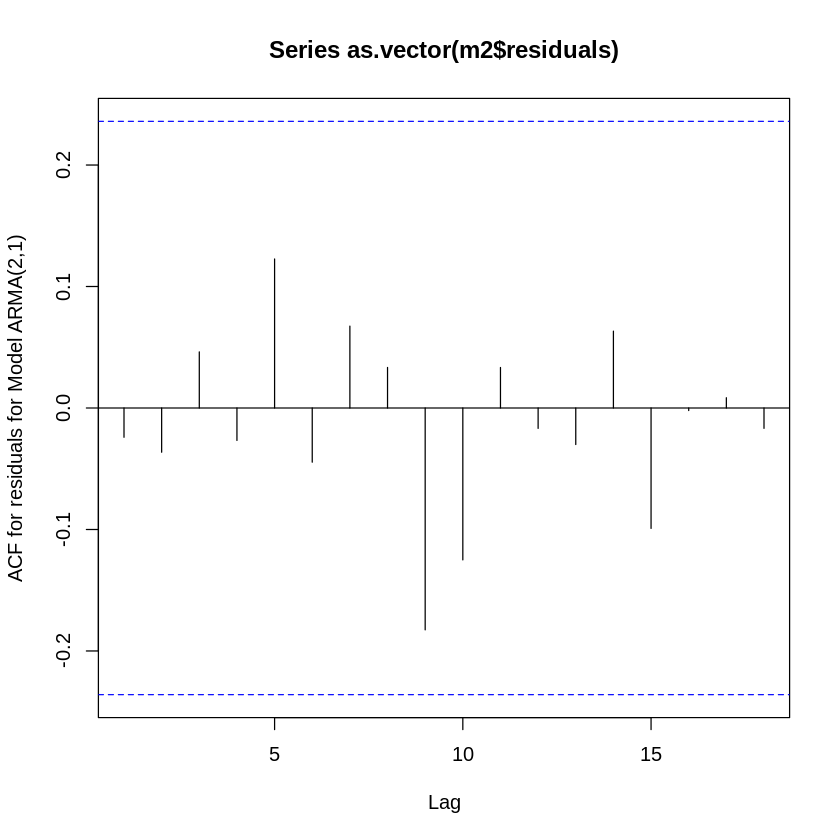

In [ ]:
acf(as.vector(m2$residuals),ylab='ACF for residuals for Model ARMA(2,1)')

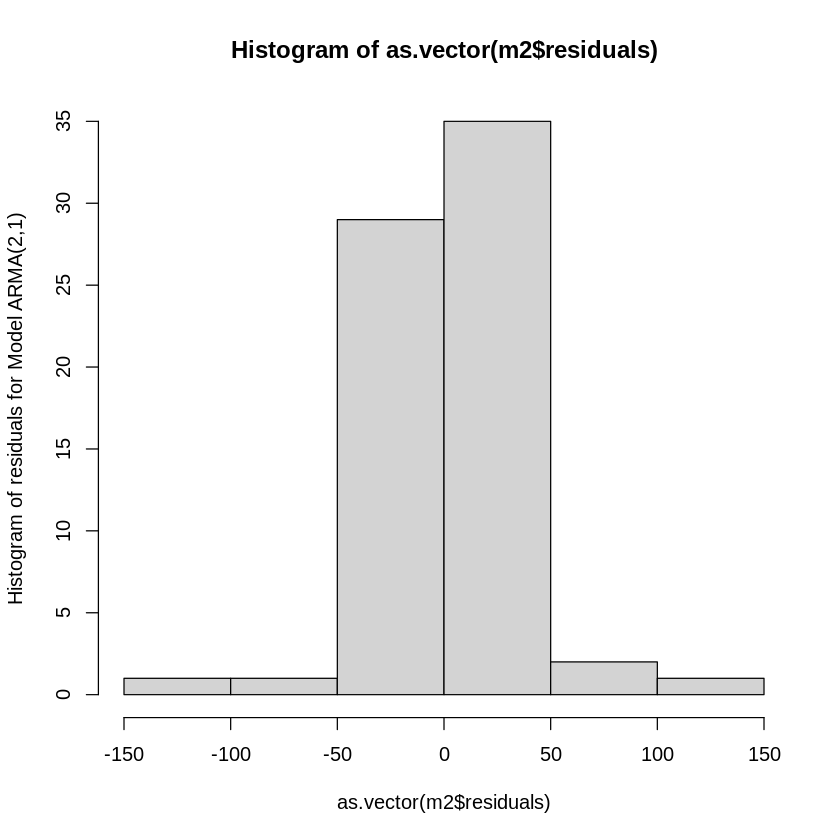

In [ ]:
hist(as.vector(m2$residuals),ylab='Histogram of residuals for Model ARMA(2,1)')

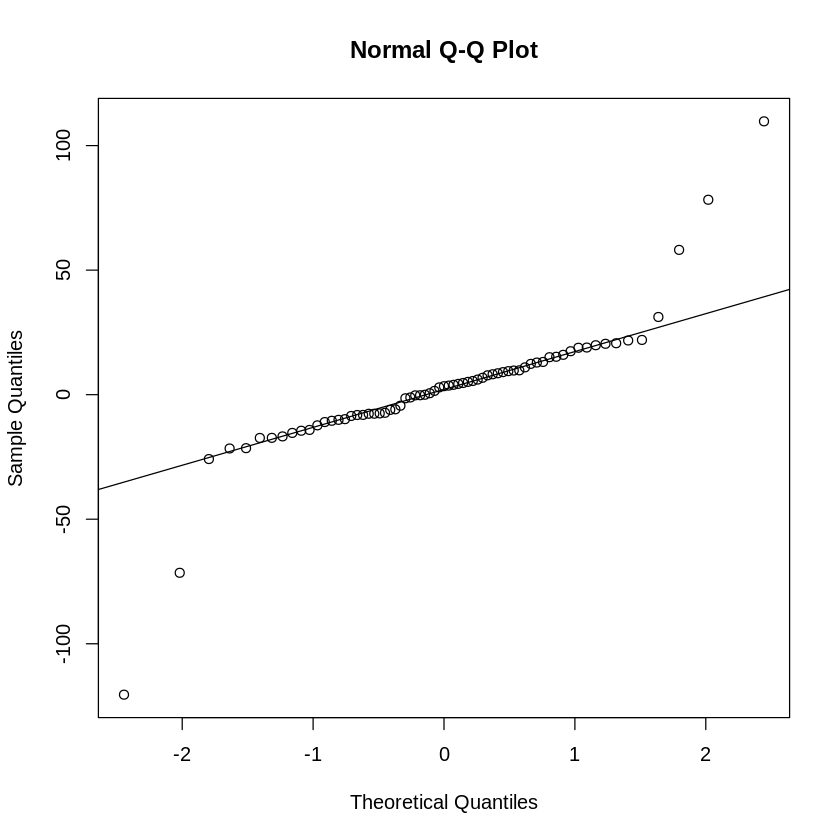

In [ ]:
qqnorm(m2$residuals)
qqline(m2$residuals)

*Residuals capture all the information of the data.A suitable model will yield residuals with the following properties:*

*1) The residuals are independent.*

*2) The residuals form stationary series.*

*We check ACF for any dependency in residuals. And check histogram and qqplots and Shapiro Wilk Test for normality.*

*All the above models show that the residuals are independent and and follow approximately normal distribution.*

*From the above models and Residual Analysis,we can see that the models are almost similar in residuals but the log likelihood value of ARMA(2,1) is the lowest among all the chosen models and it can be selected as suitable model for forecasting.*

*By checking all the models we can see that there is not a lot of difference between them so we can choose any of the models that were selected above. So, lets consider the model with least BIC and AIC values and high Log Likelihood value.*

*ARIMA(2,0,1) for Differenced Data*


*ARIMA(2,1,1) for Original Data*

*Forecasting should be done on original data.*

In [ ]:
m_1<-arima(dat,order=c(2,1,1))
m_1$x<-dat

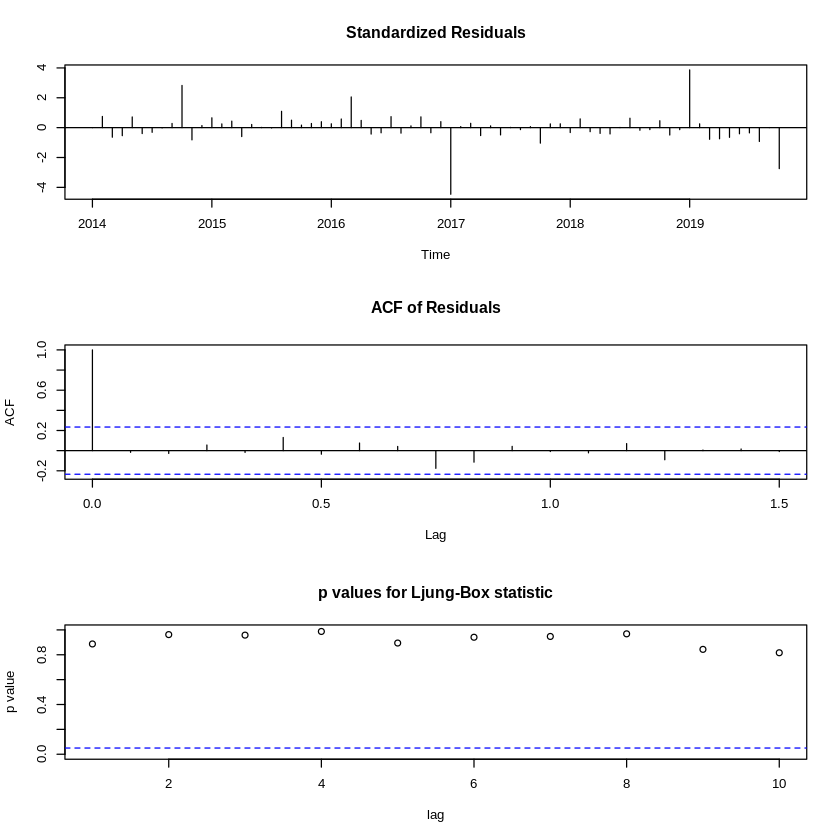

In [ ]:
tsdiag(m_1)

*Even the Ljung-Box statistic for the model selected supports that the residuals are independent.*

In [ ]:
f1<-forecast(m_1,level=c(95),h=12)
f1

         Point Forecast    Lo 95    Hi 95
Nov 2019       103.0131 48.77541 157.2508
Dec 2019       105.1862 50.15141 160.2210
Jan 2020       112.8515 57.20400 168.4990
Feb 2020       114.3104 58.58460 170.0362
Mar 2020       115.3959 59.63696 171.1549
Apr 2020       115.7308 59.96246 171.4991
May 2020       115.9048 60.13257 171.6771
Jun 2020       115.9698 60.19600 171.7436
Jul 2020       115.9995 60.22506 171.7739
Aug 2020       116.0114 60.23674 171.7861
Sep 2020       116.0166 60.24184 171.7914
Oct 2020       116.0188 60.24395 171.7936

In [ ]:
f1$mean

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
2019,,,,,,,,,,,103.0131,105.1862
2020,112.8515,114.3104,115.3959,115.7308,115.9048,115.9698,115.9995,116.0114,116.0166,116.0188,,


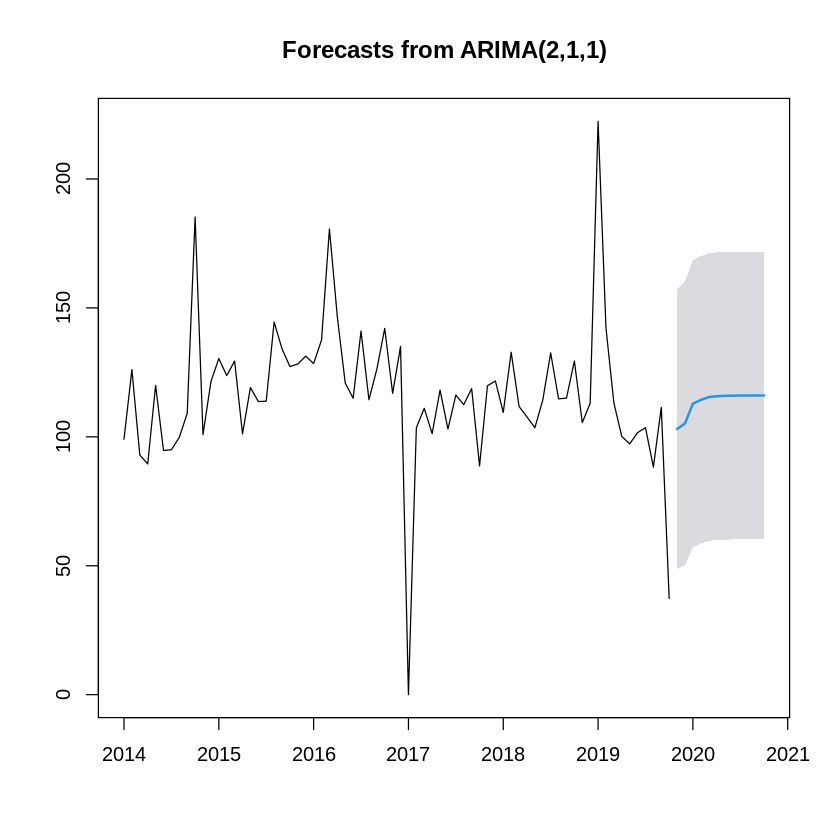

In [ ]:
plot(f1)

*GARCH - Generalized Autoregressive Conditional Heteroskedasticity Models 
GARCH is a method to measure volatility of the series to model the noise term of ARIMA model.GARCH incorporates new data and analyzes the series using conditional variances, allowing users to forecast future values using current data.An ARIMA-GARCH model is implemented to check for conditional variances.Taking the square of residuals from the model and finding the order of GARCH model from the ACF and PACF of residuals are the steps that are to be followed before fitting the original data to the ARIMA- GARCH model.*

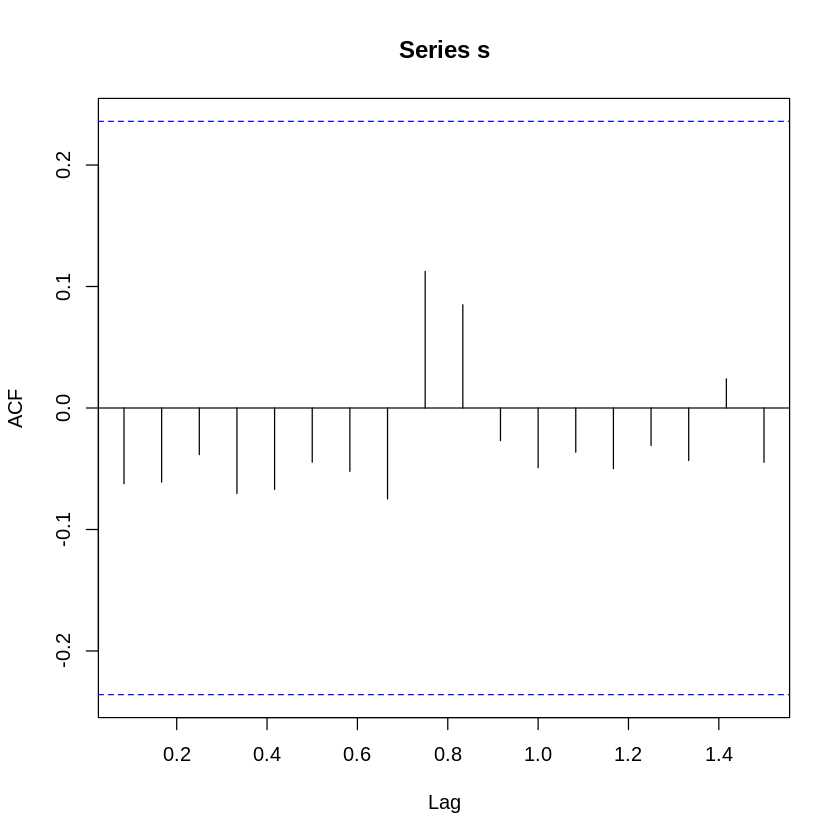

In [ ]:
s=m2$residuals*m2$residuals
acf(s)

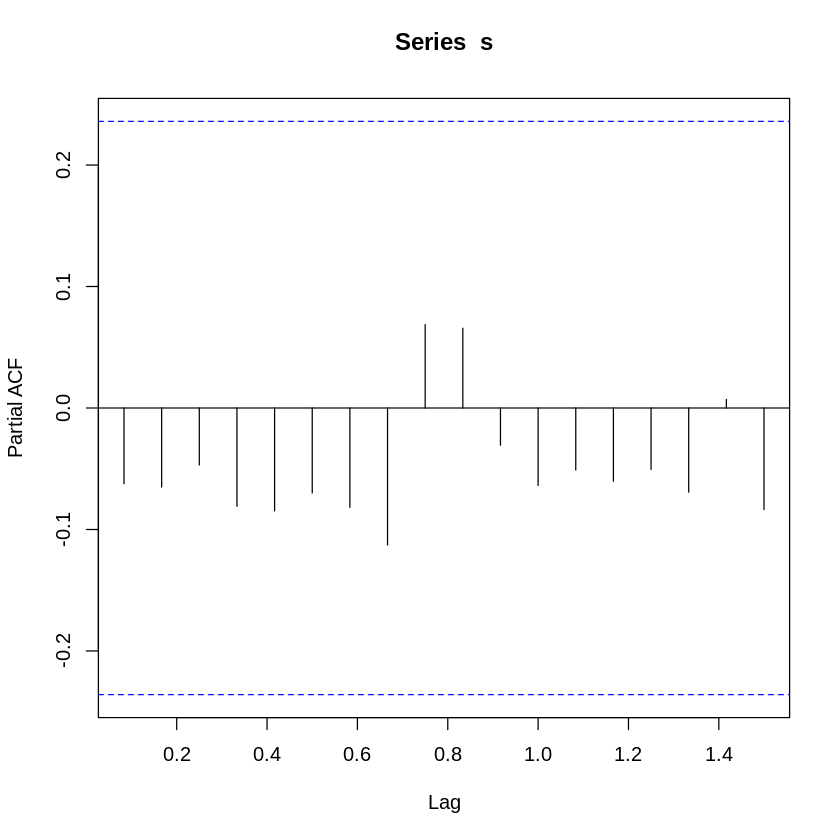

In [ ]:
pacf(s)

In [ ]:
temp_garch_data = dat
spec <- ugarchspec(variance.model = list(model = "sGARCH", 
                                         garchOrder = c(1,1), 
                                         submodel = NULL, 
                                         external.regressors = NULL, 
                                         variance.targeting = FALSE), 

                    mean.model     = list(armaOrder = c(2,1), 
                                         external.regressors = NULL, 
                                         distribution.model = "norm",arfima=TRUE),

                   fixed.pars=list(arfima=1))
        
garch1 <- ugarchfit(spec = spec, data = temp_garch_data, solver.control = list(trace=0))
garch1

Warning message:
“unidentified option(s) in mean.model:
 distribution.model”
Warning message in .sgarchfit(spec = spec, data = data, out.sample = out.sample, :
“
ugarchfit-->waring: using less than 100 data
 points for estimation
”



*---------------------------------*
*          GARCH Model Fit        *
*---------------------------------*

Conditional Variance Dynamics 	
-----------------------------------
GARCH Model	: sGARCH(1,1)
Mean Model	: ARFIMA(2,d,1)
Distribution	: norm 

Optimal Parameters
------------------------------------
         Estimate  Std. Error   t value Pr(>|t|)
mu     115.465967    3.597856  32.09299  0.00000
ar1      0.146439    0.097337   1.50445  0.13247
ar2      0.098191    0.126873   0.77393  0.43897
ma1     -1.000000    0.045109 -22.16839  0.00000
arfima   1.000000          NA        NA       NA
omega    3.278278    5.399588   0.60713  0.54376
alpha1   0.000000    0.079866   0.00000  1.00000
beta1    0.999000    0.041266  24.20888  0.00000

Robust Standard Errors:
         Estimate  Std. Error    t value Pr(>|t|)
mu     115.465967    5.862138  19.696903  0.00000
ar1      0.146439    0.316498   0.462684  0.64359
ar2      0.098191    0.069046   1.422112  0.15499
ma1     -1.000000    0.07


please wait...calculating quantiles...


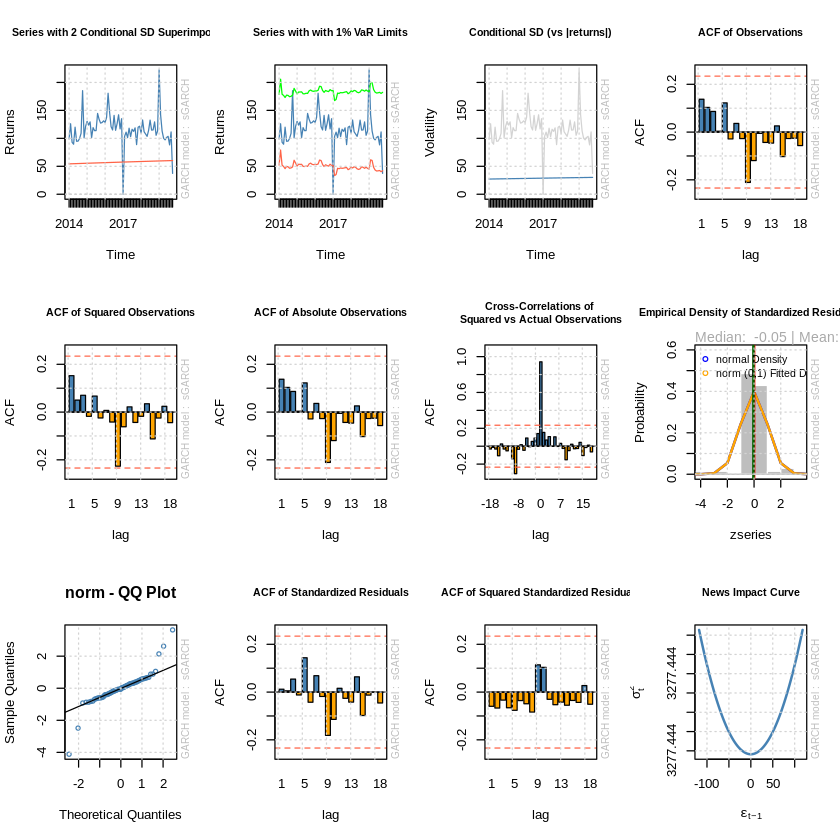

In [ ]:
plot(garch1,which='all')

In [ ]:
forecast1 = ugarchforecast(fitORspec = garch1, n.ahead = 12)
forecast1


*------------------------------------*
*       GARCH Model Forecast         *
*------------------------------------*
Model: sGARCH
Horizon: 12
Roll Steps: 0
Out of Sample: 0

0-roll forecast [T0=Oct 2019]:
     Series Sigma
T+1   103.6 30.16
T+2   106.1 30.20
T+3   112.9 30.24
T+4   114.2 30.28
T+5   115.0 30.32
T+6   115.3 30.36
T+7   115.4 30.40
T+8   115.4 30.44
T+9   115.5 30.47
T+10  115.5 30.51
T+11  115.5 30.55
T+12  115.5 30.59



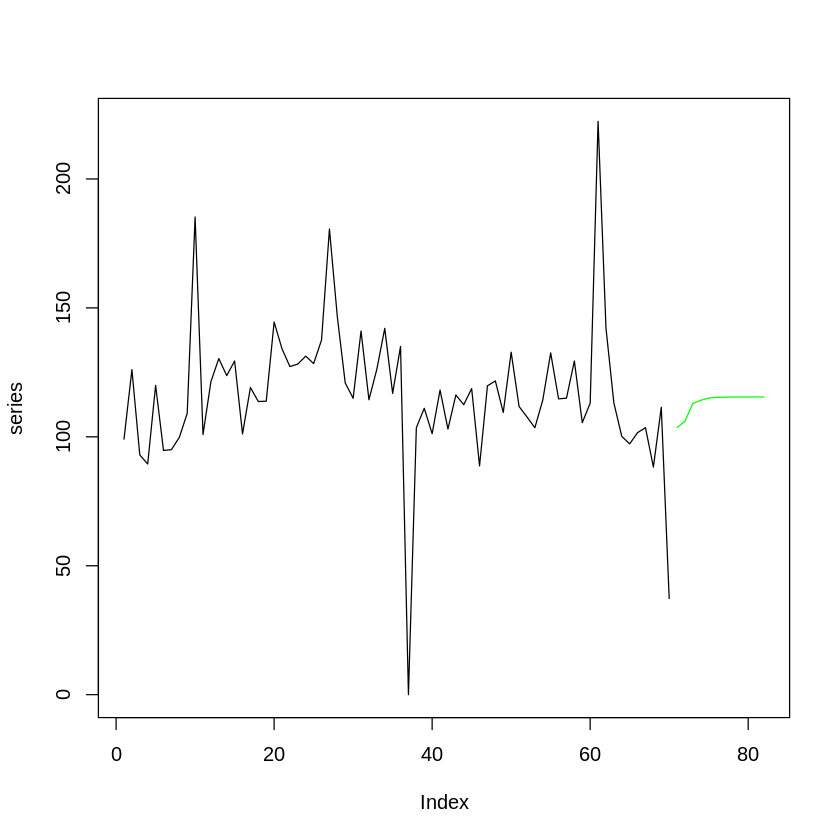

In [ ]:
series<- c(dat,rep(NA,length(fitted(forecast1))))  
forecastseries<- c(rep(NA,length(dat)),fitted(forecast1))
plot(series, type = "l")
lines(forecastseries, col = "green")

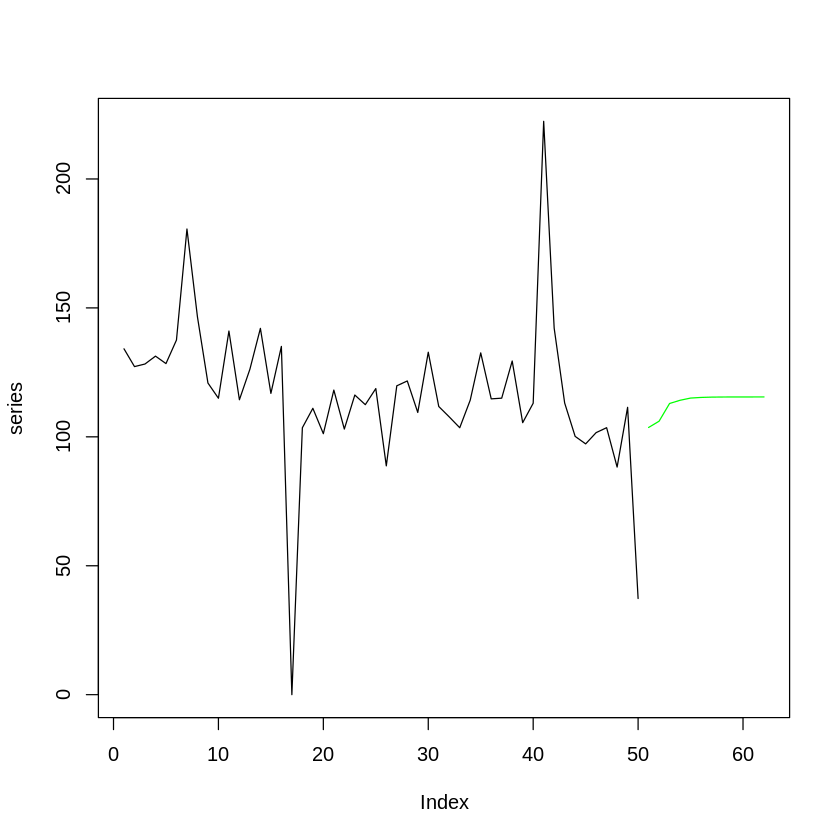

In [ ]:
series<- c(tail(dat,50),rep(NA,length(fitted(forecast1))))
forecastseries<- c(rep(NA,50),fitted(forecast1))

plot(series, type = "l")
lines(forecastseries, col = "green")

*From the above two forecasts we can see that even the ARIMA-GARCH model performs same as the normal ARIMA model which proves that there is not much conditional variance in the dataset.So, we can follow any model to estimate the original data.*

**Conclusion:**

*The model ARIMA(2,1,1) on the actual time series data did perform well to predict the future Sales volume of anti-inflammatory and antirheumatic products, non-steroids, Acetic acid derivatives and related for 1 year.The model chosen has lesser parametrs with adequate information of the timeseries to forecast the future.We can say that the sales of the particular medicine going to be constant in the near future based on the model.*

**References:**


*  https://quant.stackexchange.com/questions/4948/how-to-fit-armagarch-model-in-r
*  http://eclr.humanities.manchester.ac.uk/index.php/R_GARCH
*  https://stats.stackexchange.com/questions/254101/forecasting-time-series-using-arma-garch-in-r
*  https://www.pluralsight.com/guides/time-series-forecasting-using-r
*  http://r-statistics.co/Time-Series-Forecasting-With-R.html
*  https://medium.com/swlh/seasonality-analysis-and-forecast-in-time-series-b8fbba820327
*  https://www.itl.nist.gov/div898/handbook/pmc/section4/pmc443.htm


